# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

* Nama: Dwi Cahaya Dharma
* Email: dwi.dharma@binus.ac.id
* Id Dicoding: dwicahaya

## Persiapan 

### Menyiapkan library yang dibutuhkan

Proses impor library pada snippet code di bawah ini melibatkan berbagai library untuk berbagai keperluan dalam proyek data science kali ini, seperti untuk penanganan data dan operasi numerik, visualisasi data, keperluan statistik, dan segalanya tentang akselerasi machine learning (utilitas & prapemrosesan data, pemodelan, eavluasi, dan tuning). 

In [1]:
# --- Mengimpor library standard ---
import os 
import warnings
from IPython.display import display
warnings.filterwarnings('ignore') # Digunakan untuk menghilangkan warning message saat menjalankan beberapa kode


# --- Mengimpor library pihak ketiga --- 
# Library untuk menangani data dan operasi numerik
import math 
import numpy as np
import pandas as pd

# Library untuk visualisasi data
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk keperluan statistik
import researchpy as rp
from scipy import stats
from scipy.stats import chi2_contingency

# Library untuk utilitas & prapemrosesan data sebagai keperluan machine learning 
from sklearn.utils import resample
from sklearn.decomposition import PCA 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib

# Library untuk pemodelan, evaluasi, dan tuning machine learning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.stats import uniform, reciprocal, randint

### Menyiapkan data yang akan digunakan

Data yang akan kita gunakan dalam proyek data science kali ini berasal dari dataset yang telah disediakan oleh Dicoding sendiri melalui GitHub raw files. pd.read_csv(URL, sep=';') dijalankan dengan menambahkan (sep=';') karena kolom antar kolom dalam dataset ini dibatasi oleh karakter titik koma (;). 

In [2]:
# --- Menyiapkan dataset yang diperlukan --- 
# Menyiapkan dataset mentah dari GitHub raw files 
URL = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv"

# Mengunduh dan membaca file dari GitHub raw files 
try:
    student_data = pd.read_csv(URL, sep=';') # 'student_data' adalah nama dataframe yang akan kita gunakan selama proyek ini.
    print("File .csv berhasil diunduh dan terbaca.")
except Exception as e:
    print(f"Ada error ketika mencoba mengunduh file .csv: {e}")

File .csv berhasil diunduh dan terbaca.


# Data Understanding

## Initial Exploration

### Basic Inspection

Kita akan coba memeriksa tipe data dari setiap fitur dalam dataset yang diberikan dengan menjalankan fungsi display(student_data.dtypes). 

In [3]:
# Memeriksa isi data dari dataframe 'student_data' 
display(student_data.dtypes)

Marital_status                                    int64
Application_mode                                  int64
Application_order                                 int64
Course                                            int64
Daytime_evening_attendance                        int64
Previous_qualification                            int64
Previous_qualification_grade                    float64
Nacionality                                       int64
Mothers_qualification                             int64
Fathers_qualification                             int64
Mothers_occupation                                int64
Fathers_occupation                                int64
Admission_grade                                 float64
Displaced                                         int64
Educational_special_needs                         int64
Debtor                                            int64
Tuition_fees_up_to_date                           int64
Gender                                          

Berdasarkan informasi mengenai tipe data dari setiap kolom di atas, bisa dikatakan bahwa terdapat cukup banyak kolom yang tipe datanya tidak sesuai dengan peruntukan sebenarnya (kategorikal), seperti kolom 'Marital_status', 'Application_order', 'Application_mode', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', dan 'International'. Kolom-kolom ini seharusnya merupakan tipe data 'object' (String), bukannya tipe data 'int64.' Oleh sebab itu, kita perlu melakukan penanganan dalam bentuk perubahan tipe data dari kolom-kolom tersebut ke tipe data Object. 

In [4]:
# --- Mengubah tipe data sebagian besar kolom ke kategorikal ---
# Mendefinisikan kolom-kolom yang perlu diubah tipe datanya 
cat_cols = [
    'Marital_status',
    'Application_order', 
    'Application_mode',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Nacionality',
    'Mothers_qualification', 
    'Fathers_qualification', 
    'Mothers_occupation',   
    'Fathers_occupation',   
    'Displaced',
    'Educational_special_needs', 
    'Debtor',
    'Tuition_fees_up_to_date',   
    'Gender',
    'Scholarship_holder',   
    'International'
]

# Mengonversi tipe data kolom yang dimasukkan dalam 'cat_cols' ini ke kategorikal 
cols_to_convert = [col for col in cat_cols if col in student_data.columns]

if cols_to_convert:
    student_data[cols_to_convert] = student_data[cols_to_convert].astype('object')
else:
    print("Kolom yang akan diubah tidak ditemukan dalam dataframe. Tidak bisa menjalankan eksekusi...")

Selain itu, kita juga perlu mengganti nama kolom 'Nacionality' menjadi 'Nationality' agar penggunaan bahasa pada setiap fitur menjadi seragam dalam dataset ini (berbahasa Inggris). 

In [5]:
# --- Mengganti nama kolom 'Nacionality' menjadi 'Nationality' --- 
OLD_COL_NAME = 'Nacionality' 
NEW_COL_NAME = 'Nationality'

student_data.rename(columns={OLD_COL_NAME: NEW_COL_NAME}, inplace=True) 
print("Kolom 'Nacionality' telah berganti nama menjadi 'Nationality'.")

Kolom 'Nacionality' telah berganti nama menjadi 'Nationality'.


Setelah selesai melakukan perubahan tipe data terhadap sebagian fitur kategorikal dari 'int64' ke 'object' dan penggantian nama fitur kategorikal 'Nacionality' menjadi 'Nationality', kita memeriksa ulang tipe data dalam fitur-fitur tadi dengan memanggil fungsi display(student_data.dtypes). 

In [6]:
# --- Memeriksa ulang tipe-tipe data dalam dataframe 'student_data' 
display(student_data.dtypes)

Marital_status                                   object
Application_mode                                 object
Application_order                                object
Course                                           object
Daytime_evening_attendance                       object
Previous_qualification                           object
Previous_qualification_grade                    float64
Nationality                                      object
Mothers_qualification                            object
Fathers_qualification                            object
Mothers_occupation                               object
Fathers_occupation                               object
Admission_grade                                 float64
Displaced                                        object
Educational_special_needs                        object
Debtor                                           object
Tuition_fees_up_to_date                          object
Gender                                          

Dari hasil di atas, tipe data pada semua fitur dirasa sudah sesuai dan kita bisa lanjut ke tahap pemeriksaan isi nilai dari setiap baris dalam dataset ini beserta kemungkinan adanya nilai kosong (missing values). Selain itu, kita juga memanggil fungsi 'display(student_data)' untuk melihat isian data secara umum dalam dataset ini. 

In [7]:
# --- Melakukan pemeriksaan isi nilai dataframe ---
print(f"Terdapat sebanyak {student_data.shape[1]} kolom dan {student_data.shape[0]} baris dalam dataframe ini.")
print(f"Terdapat sebanyak data {student_data.isnull().sum().sum()} dengan nilai kosong (missing values).\n")
display(student_data) 

Terdapat sebanyak 37 kolom dan 4424 baris dalam dataframe ini.
Terdapat sebanyak data 0 dengan nilai kosong (missing values).



,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Berdasarkan hasil pemeriksaan di atas, tidak ada satu pun baris dalam dataset ini yang memiliki nilai kosong (missing values). Selain itu, dataset ini memiliki sebanyak 37 kolom dan 4424 baris (sampel data). 

Tahapan berikutnya adalah melihat gambaran statistik secara umum dari variabel numerik dengan memanggil fungsi 'student_data.describe().T'

In [8]:
# --- Melihat gambaran statistik dari variabel numerical ---
student_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Admission_grade,4424.0,126.978119,14.482001,95.00,117.90,126.100000,134.800000,190.000000
Age_at_enrollment,4424.0,23.265145,7.587816,17.00,19.00,20.000000,25.000000,70.000000
Curricular_units_1st_sem_credited,4424.0,0.709991,2.360507,0.00,0.00,0.000000,0.000000,20.000000
Curricular_units_1st_sem_enrolled,4424.0,6.270570,2.480178,0.00,5.00,6.000000,7.000000,26.000000
Curricular_units_1st_sem_evaluations,4424.0,8.299051,4.179106,0.00,6.00,8.000000,10.000000,45.000000
Curricular_units_1st_sem_approved,4424.0,4.706600,3.094238,0.00,3.00,5.000000,6.000000,26.000000
Curricular_units_1st_sem_grade,4424.0,10.640822,4.843663,0.00,11.00,12.285714,13.400000,18.875000
Curricular_units_1st_sem_without_evaluations,4424.0,0.137658,0.690880,0.00,0.00,0.000000,0.000000,12.000000
Curricular_units_2nd_sem_credited,4424.0,0.541817,1.918546,0.00,0.00,0.000000,0.000000,19.000000


Setelah itu, kita juga memanggil fungsi 'display(student_data.select_dtypes(include=object).describe())' dan 'display(summary_df)' untuk menampilkan gambaran statistik umum dari variabel kategorikal dalam dataset ini. 

In [9]:
# --- Melihat gambaran statistik dari variabel kategorikal ---
# Menentukan fitur-fitur kategorikal 
cat_cols = student_data.select_dtypes(include=object).columns.tolist()

# Menampilkan gambaran statistik dari variabel kategorikal
summary_df = pd.DataFrame()

for col in cat_cols:
    freqs = student_data[col].value_counts().reset_index()
    freqs.columns = ['Unique Value', 'Frequency']
    freqs['Variable'] = col
    summary_df = pd.concat([summary_df, freqs], ignore_index=True)

display(student_data.select_dtypes(include=object).describe())
print()
display(summary_df)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Nationality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,International,Status
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,18,8,17,2,17,21,29,34,32,46,2,2,2,2,2,2,2,3
top,1,1,1,9500,1,1,1,1,37,9,9,1,0,0,1,0,0,0,Graduate
freq,3919,1708,3026,766,3941,3717,4314,1069,1209,1577,1010,2426,4373,3921,3896,2868,3325,4314,2209


,Unique Value,Frequency,Variable
0,1,3919,Marital_status
1,2,379,Marital_status
2,4,91,Marital_status
3,5,25,Marital_status
4,6,6,Marital_status
...,...,...,...
242,0,4314,International
243,1,110,International
244,Graduate,2209,Status
245,Dropout,1421,Status


## Feature Exploration

### Visualization Helper Functions for Ease of Exploratory Data Process

Sebelum melakukan Exploratory Data Analysis (EDA), kita perlu membuat beberapa fungsi helper, di mana setiap fungsi helper mewakili satu bentuk visualisasi data yang akan digunakan dalam tahapan EDA ini. Fungsi helper berikut melibatkan visualisasi count plot, box plot, multiple box plot, bar chart, stacked bar chart, dan multiple stacked bar chart. 

In [10]:
# --- Membuat fungsi helper untuk kebutuhan visualisasi --- 
# 1). Fungsi count plot chart
def plot_countplot(df, col_name, hue=None, ax=None):
    if col_name not in df.columns:
        print(f"Error: Kolom '{col_name}' tidak ditemukan dalam datafrane.")
        return

    if ax is None:
        ax = plt.gca()
    sns.countplot(data=df, x=col_name, hue=hue, ax=ax)
    ax.set_title(f'Count Plot of {col_name} by {hue}' if hue else f'Count Plot of {col_name}')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Count')
    if hue:
         ax.legend(title=hue)


# 2). Fungsi box plot chart 
def plot_boxplot(data, x_col, y_col=None, hue=None, title="Box Plot", xlabel="X-axis", ylabel="Y-axis", ax=None):
    if ax is None:
        ax = plt.gca()
    sns.boxplot(data=data, x=x_col, y=y_col, hue=hue, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)


# 3). Fungsi multi box plot chart
def plot_multi_boxplot(plot_configs, n_cols=2, figsize=(14, 32)): 
    n_plots = len(plot_configs)
    if n_plots == 0:
        print("No plot configurations provided.")
        return

    n_rows = (n_plots + n_cols - 1) // n_cols 

    row_height = 4 
    figsize = (12, max(6, n_rows * row_height))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    if n_rows > 1 or n_cols > 1:
        axes = axes.flatten()
    else:
        axes = [axes] 

    for i, config in enumerate(plot_configs):
        if i < n_plots:
            ax = axes[i]
            data = config.get('data')
            x_col = config.get('x_col')
            y_col = config.get('y_col') 
            hue = config.get('hue')
            title = config.get('title', "Box Plot") 
            xlabel = config.get('xlabel')
            ylabel = config.get('ylabel')

            if data is not None and x_col is not None:
                 plot_boxplot(data, x_col, y_col=y_col, hue=hue, title=title, xlabel=xlabel, ylabel=ylabel, ax=ax)
            else:
                 print(f"Warning: Skipping plot configuration {i} due to missing data or x_col.")

    for j in range(n_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout() 
    plt.show()


# 4). Fungsi bar chart
def plot_bar(data, x_col, y_col=None, hue=None, title="Bar Chart", xlabel="X-axis", ylabel="Y-axis", ax=None):
    if ax is None:
        ax = plt.gca()
    if y_col:
        sns.barplot(data=data, x=x_col, y=y_col, hue=hue, ax=ax)
    else:
        sns.countplot(data=data, x=x_col, hue=hue, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', labelrotation=45)

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
                    ha='center', va='bottom')


# 5). Fungsi stacked bar chart
def plot_stack_bar(df, x_column, stack_column, ax=None, title=None, xlabel=None, ylabel='Count'):
    if ax is None:
        ax = plt.gca()

    if x_column not in df.columns:
        print(f"Error: x_column '{x_column}' not found in DataFrame.")
        return
    if stack_column not in df.columns:
        print(f"Error: stack_column '{stack_column}' not found in DataFrame.")
        return

    stacked_counts = df.groupby([x_column, stack_column]).size().unstack(fill_value=0)

    stacked_counts.plot(kind='bar', stacked=True, ax=ax)

    if title is None:
        title = f'Distribution of {stack_column} by {x_column}'
    ax.set_title(title)

    if xlabel is None:
        xlabel = x_column
    ax.set_xlabel(xlabel)

    ax.set_ylabel(ylabel)

    ax.legend(title=stack_column)

    plt.sca(ax) 
    plt.xticks(rotation=45, ha='right')


# 6). Fungsi multi stacked bar chart
def plot_multi_stack_bars(plot_configs, n_cols=2, figsize=(14, 32)):
    n_plots = len(plot_configs)
    if n_plots == 0:
        print("No plot configurations provided.")
        return

    n_rows = (n_plots + n_cols - 1) // n_cols

    row_height = 5 
    figsize = (14, max(8, n_rows * row_height))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = [axes]

    for i, config in enumerate(plot_configs):
        if i < n_plots:
            ax = axes[i]
            df = config.get('df')
            x_column = config.get('x_column')
            stack_column = config.get('stack_column')
            title = config.get('title')
            xlabel = config.get('xlabel')
            ylabel = config.get('ylabel', 'Count') 

            if df is not None and x_column is not None and stack_column is not None:
                 plot_stack_bar(df=df, x_column=x_column, stack_column=stack_column,
                                           title=title, xlabel=xlabel, ylabel=ylabel, ax=ax)
            else:
                 print(f"Warning: Skipping plot configuration {i} due to missing df, x_column, or stack_column.")

    for j in range(n_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout() 
    plt.show()

### Exploratory Data Analysis (EDA)

Tahapan Exploratory Data Analysis (EDA) dalam proyek data science kali ini diawali dengan melakukan visualisasi terhadap gambaran umum jumlah siswa berdasarkan fitur 'Status' dalam bentuk bar chart.  

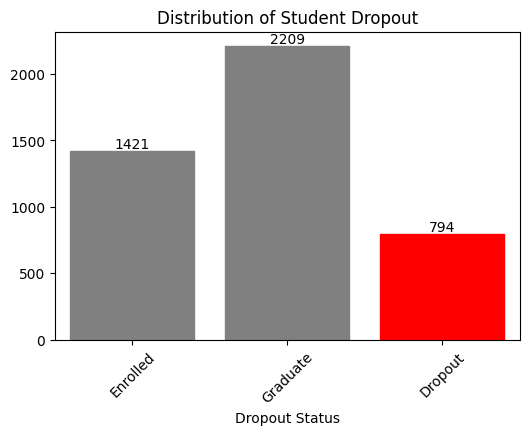

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))

# --- Visualisasi distribusi Status of Dropout dengan bar chart --- 
plot_bar(student_data, "Status", title="Distribution of Student Dropout", xlabel="Dropout Status", ylabel="", ax=ax)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Enrolled', 'Graduate', 'Dropout'])
bars = ax.containers[0]
bars[0].set_color('gray') 
bars[1].set_color('gray') 
bars[2].set_color('red')

Visualisasi bar chart ini memberikan gambaran langsung tentang skala fenomena dropout dalam dataset mahasiswa ini. Angka mahasiswa yang teridentifikasi mengalami Drop Out (ditandai dengan bar berwarna merah di atas) mencapai 794 siswa. Saat membandingkan angka ini dengan total keseluruhan jumlah mahasiswa dalam data, kita melihat bahwa 794 siswa ini merepresentasikan sekitar 18% dari total populasi mahasiswa, atau hampir seperempatnya. Temuan awal ini menunjukkan bahwa, meskipun jumlah dropout cukup signifikan dalam angka absolut, proporsi mahasiswa yang mengalami dropout masih berada di bawah seperlima dari total populasi yang ada dalam data ini.

Pada visualisasi EDA berikutnya di bawah ini, kita akan melihat hubungan antara status siswa (terutama yang Dropout) dengan fitur-fitur terkait kinerja & engagement siswa dengan memanfaatkan visualisasi box plot. 

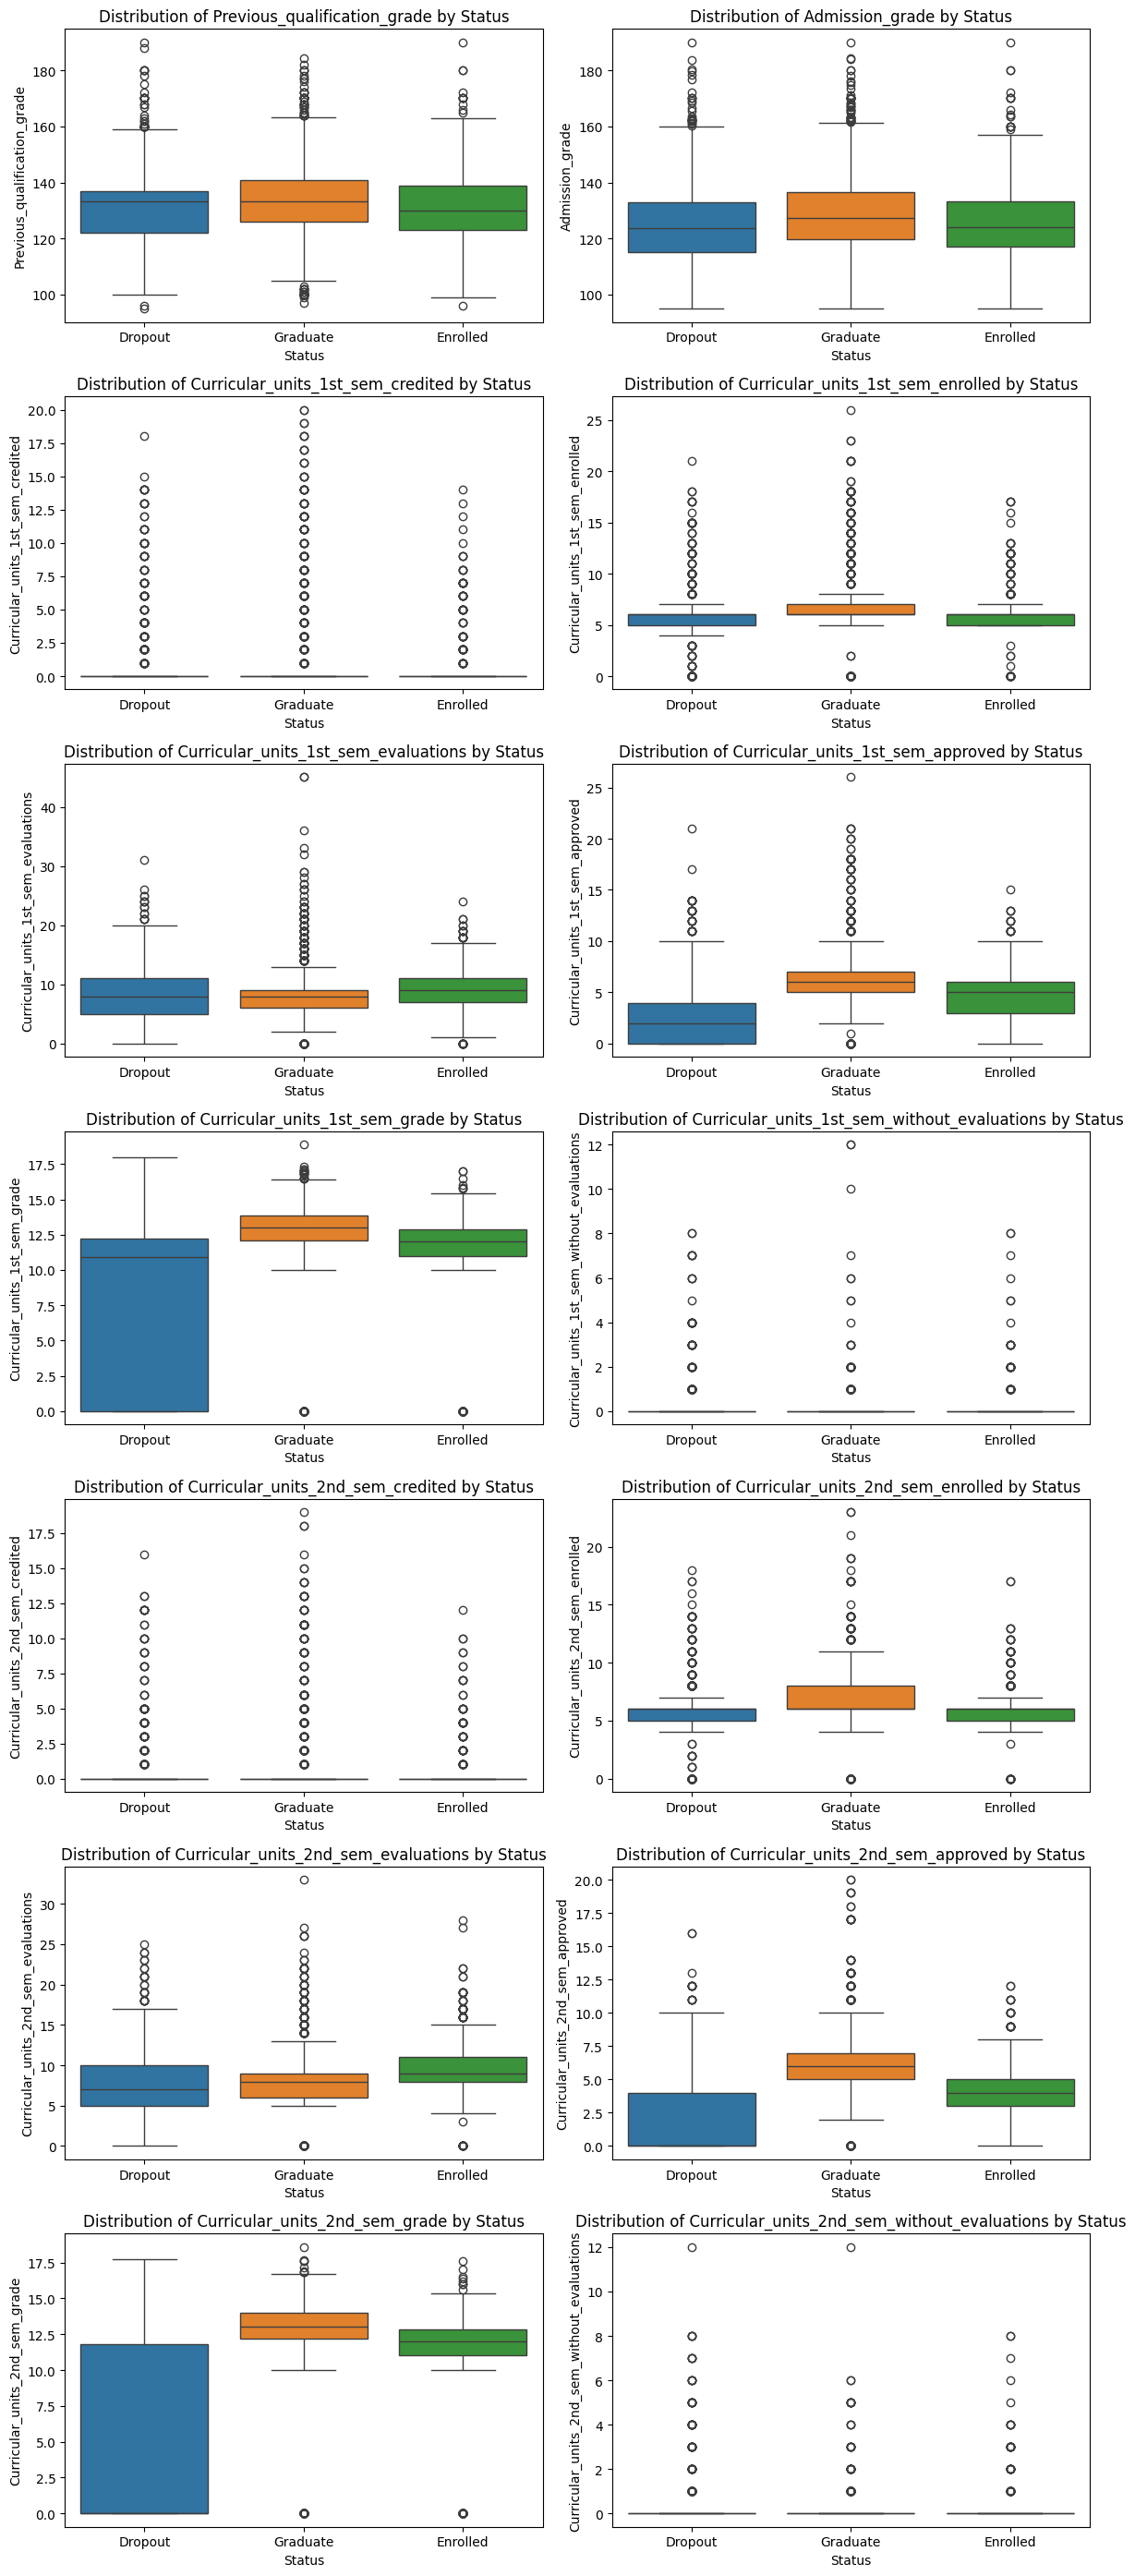

In [12]:
# --- Visualisasi korelasi dropout dengan kolom-kolom terkait performa akademik & engagement --- 
# Menentukan fitur-fitur terkait kinerja dan engagement siswa 
performance_engagement_cols = [
    'Previous_qualification_grade',
    'Admission_grade',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations',
]

plot_df = student_data.copy() 

# Visualisasi distribusi grade dan approved units dengan multiple box plot chart
boxplot_configurations = []
for col in performance_engagement_cols:
    config = {
        'data': plot_df,
        'x_col': 'Status',
        'y_col': col,
        'hue': 'Status',
        'title': f'Distribution of {col} by Status',
        'xlabel': 'Status',
        'ylabel': col
    }
    boxplot_configurations.append(config)

plot_multi_boxplot(boxplot_configurations)

Visualisasi box plot yang menampilkan distribusi berbagai metrik performa akademik berdasarkan status akhir mahasiswa (Dropout, Enrolled, Graduate) memberikan wawasan penting tentang pola studi mereka. Menariknya, untuk sejumlah metrik seperti nilai kualifikasi sebelumnya (Previous_qualification_grade), nilai saat admisi (Admission_grade), serta berbagai aspek unit dan evaluasi di semester pertama, visualisasi menunjukkan tidak ada perbedaan atau korelasi yang jelas pada nilai tipikal (median) atau distribusi antara mahasiswa yang drop out dengan kelompok lainnya. Ini menyiratkan bahwa performa awal atau metrik proses di semester pertama mungkin tidak secara kuat membedakan mahasiswa yang akan drop out.

Namun, cerita berbeda terlihat pada dua metrik hasil di semester kedua: jumlah unit yang diselesaikan/disetujui (Curricular_units_2nd_sem_approved) dan nilai rata-rata (Curricular_units_2nd_sem_grade). Pada kedua fitur ini, visualisasi menunjukkan korelasi yang jelas dengan status dropout. Secara spesifik, mahasiswa yang mengalami drop out cenderung didominasi oleh mereka yang berhasil menyelesaikan unit di bawah 5 pada semester kedua, dan memiliki nilai rata-rata di bawah 12 di semester yang sama. Temuan ini menggarisbawahi bahwa performa akademik yang rendah pada hasil akhir di semester kedua, ditandai oleh sedikitnya unit yang diselesaikan dan nilai rata-rata yang rendah, memiliki hubungan yang lebih jelas dan kuat dengan kecenderungan putus studi (Dropout). 

Pada visualisasi data di atas juga, hampir semua fitur yang diobservasi memiliki cukup banyak outlier (kemungkinan tingginya angka skewness) yang perlu ditangani pada bagian Data Preparation/Preprocessing. 

Pada visualisasi EDA berikutnya di bawah ini, kita akan melihat hubungan antara status siswa (terutama yang Dropout) dengan fitur-fitur terkait latar belakang dan demografi siswa dengan memanfaatkan visualisasi multiple stacked bar chart. 

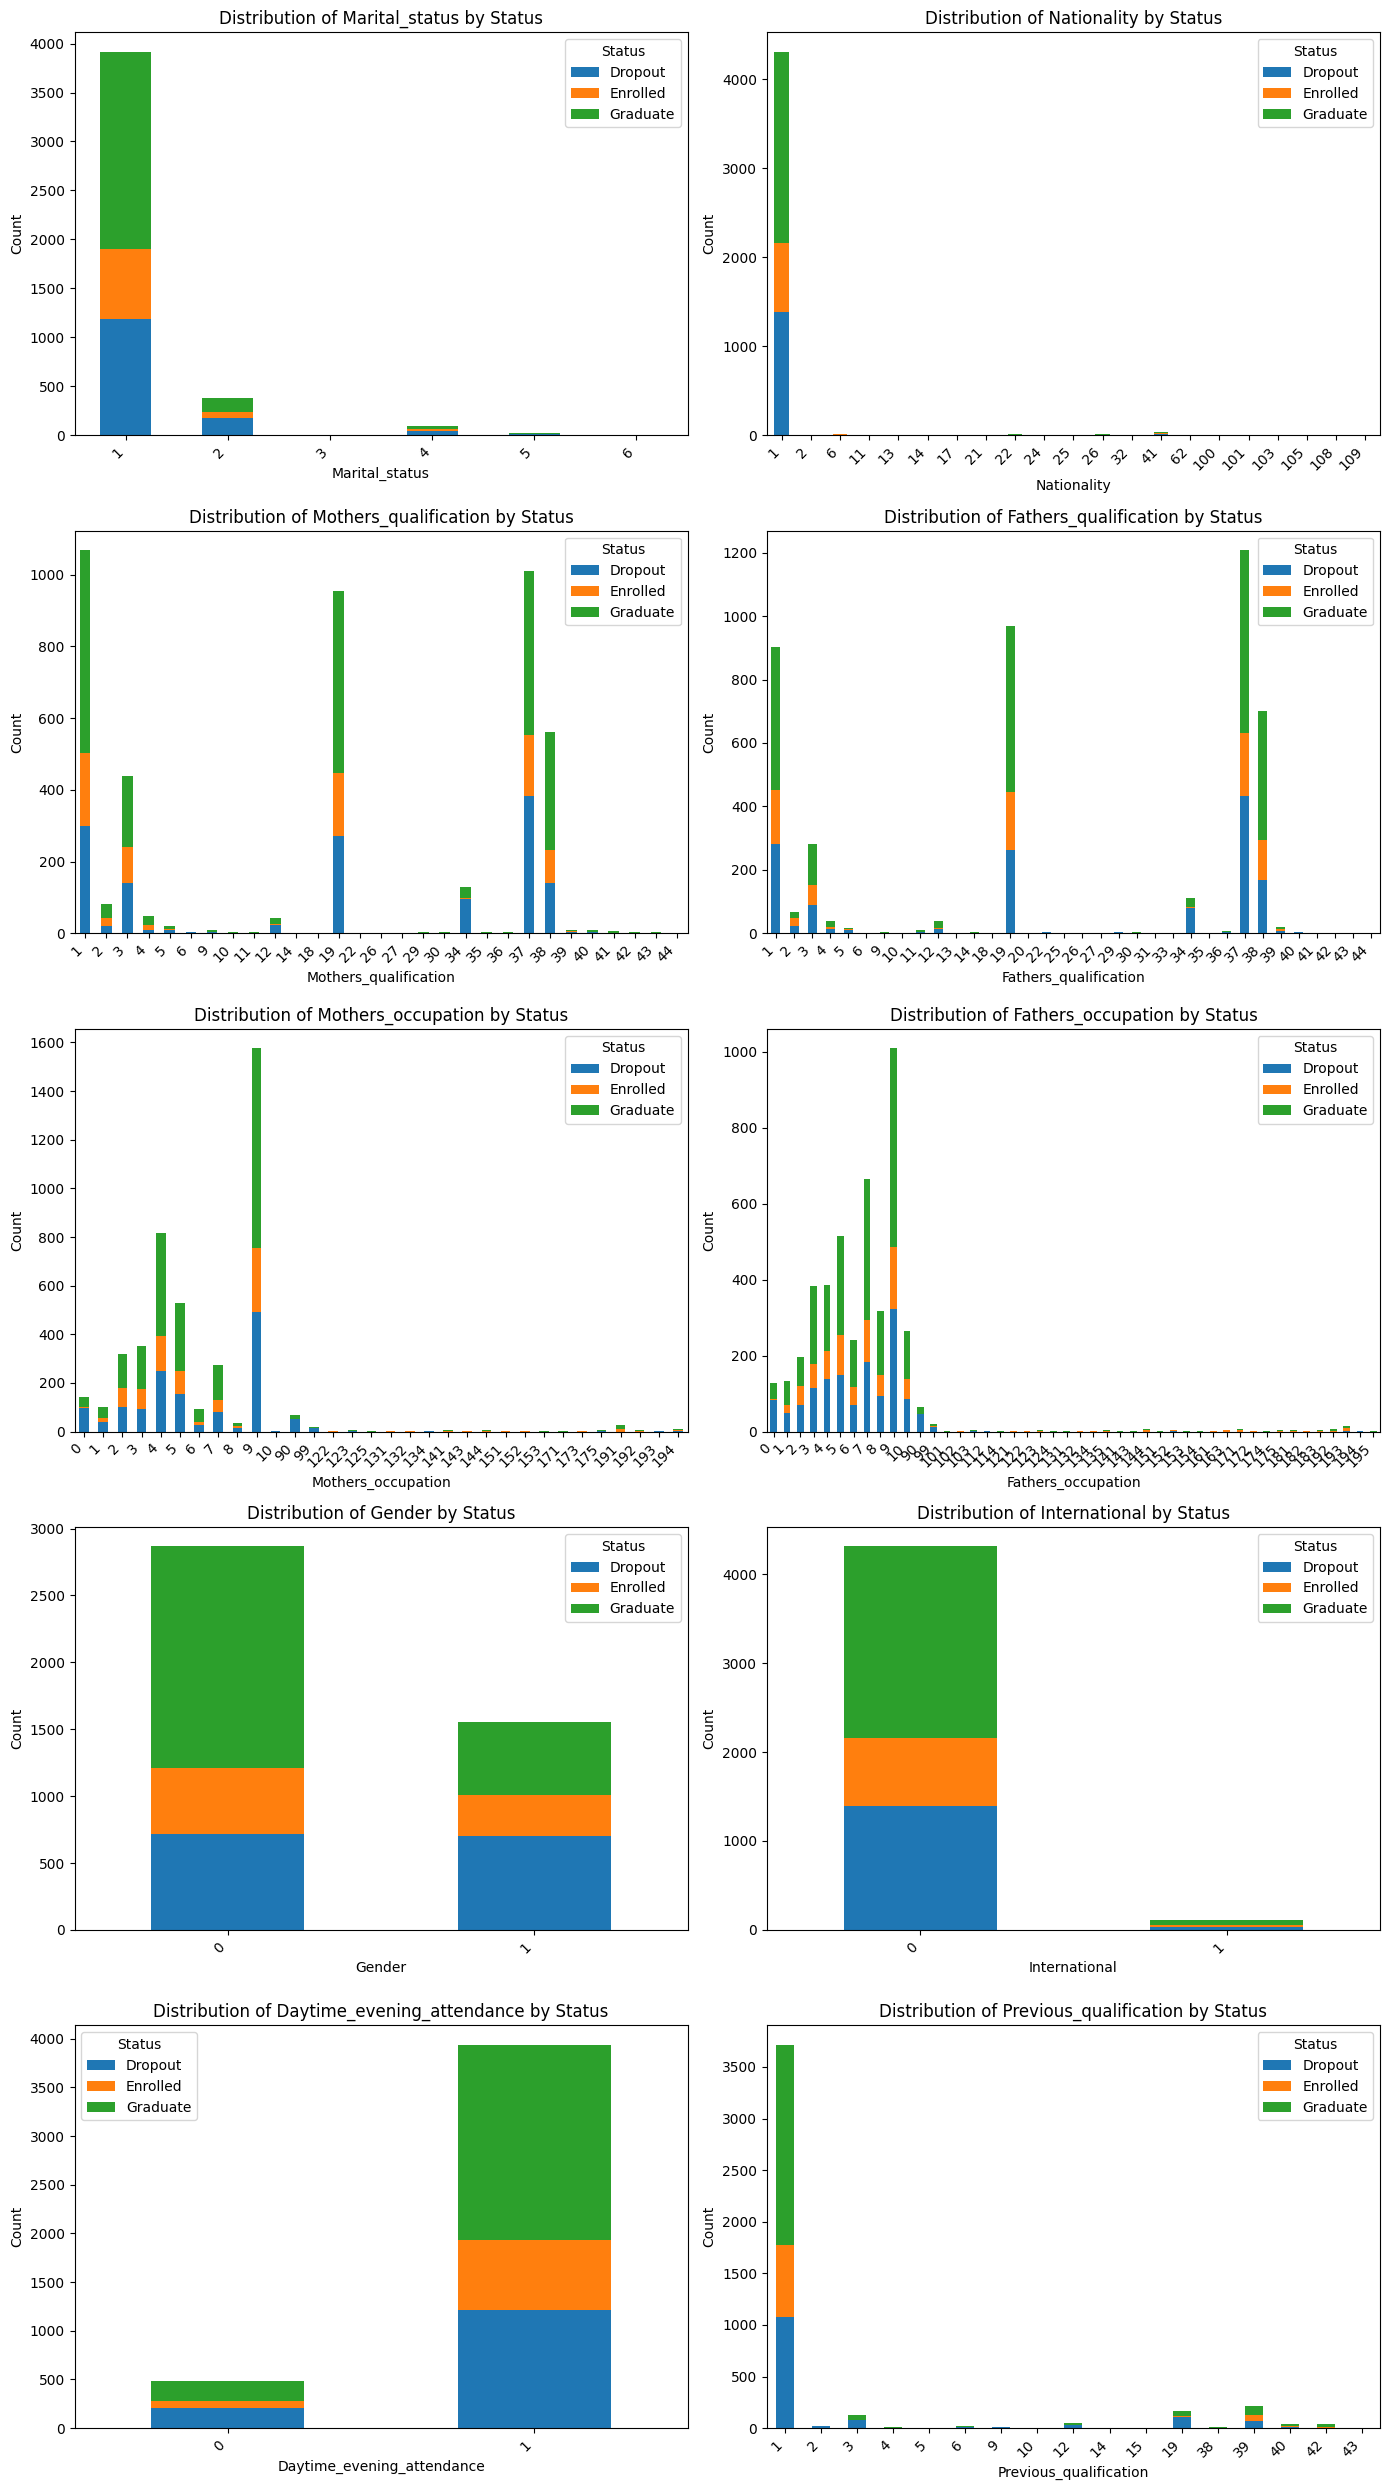

In [13]:
# --- Visualisasi korelasi dropout dengan kolom-kolom terkait demografi & latar belakang --- 
# Menentukan fitur-fitur terkait demografi & latar belakang 
demographic_cat_cols = [
    'Marital_status',
    'Nationality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Gender',
    'International',
    'Daytime_evening_attendance',
    'Previous_qualification'
]

plot_df = student_data.copy() 

# Visualisasi distribusi fitur-fitur kategorikal terkait demografis & latar belakang dengan count plot chart 
stack_bar_configurations = []

for col in demographic_cat_cols:
     if col in plot_df.columns:
        config = {
            'df': plot_df,
            'x_column': col,       
            'stack_column': 'Status',
            'title': f'Distribution of {col} by Status',
            'xlabel': col,
            'ylabel': 'Count'
        }
        stack_bar_configurations.append(config)
     else:
         print(f"Warning: Column '{col}' not found in the DataFrame. Skipping configuration.")

plot_multi_stack_bars(stack_bar_configurations)

Visualisasi count plot ini memberikan potret detail mengenai profil mahasiswa yang cenderung mengalami dropout berdasarkan berbagai karakteristik demografis dan latar belakang. Mahasiswa yang drop out didominasi oleh mereka yang berstatus pernikahan lajang/single (status 1) dan berkebangsaan Portuguese (status 1). Selain itu, mayoritas siswa dropout adalah siswa reguler non-internasional (International = 0) yang mengambil jadwal studi di siang hari (Daytime_evening_attendance = 1).

Menelusuri latar belakang pendidikan dan pekerjaan orang tua, visualisasi menunjukkan bahwa mayoritas siswa dropout memiliki Ibu dan Ayah dengan tingkat kualifikasi pada kategori pendidikan dasar hingga menengah (kualifikasi 37, 19, 1). Serupa, dari sisi pekerjaan, orang tua (baik Ibu maupun Ayah) mereka didominasi oleh kategori pekerja tidak terampil (Occupation 9), dengan selisih signifikan dibanding kategori pekerjaan lain. Kualifikasi sebelumnya dari siswa dropout sendiri mayoritas adalah pendidikan menengah (kategori 1). Menariknya, visualisasi tidak menunjukkan adanya pengaruh yang jelas dari faktor Jenis Kelamin terhadap status dropout siswa.

Secara keseluruhan, data ini mengilustrasikan profil khas siswa yang berisiko dropout, menekankan pentingnya status pernikahan, kebangsaan, jadwal studi, serta latar belakang pendidikan dan pekerjaan orang tua dalam memahami fenomena dropout ini.

Pada visualisasi EDA berikutnya di bawah ini, kita akan melihat hubungan antara status siswa (terutama yang Dropout) dengan umur siswa saat mendaftar (fitur 'Age_at_enrollment') dengan memanfaatkan visualisasi box plot. 

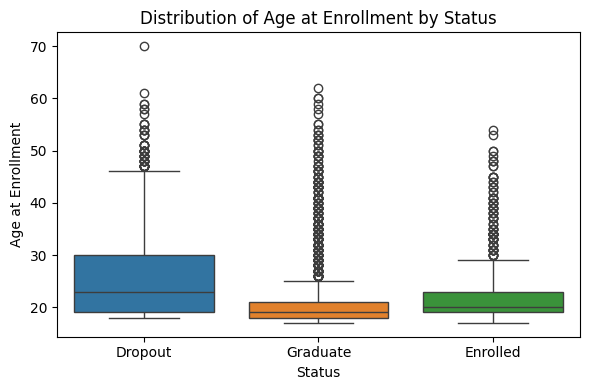

In [14]:
# --- Visualisasi distribusi fitur-fitur numerikal terkait demografis & latar belakang dengan box plot chart --- 
plot_df = student_data.copy() 

plt.figure(figsize=(6, 4))

plot_boxplot(
    data=plot_df,        
    x_col='Status',             
    y_col='Age_at_enrollment',  
    hue='Status', 
    title='Distribution of Age at Enrollment by Status',
    xlabel='Status',
    ylabel='Age at Enrollment'
)

plt.tight_layout() 
plt.show() 

Visualisasi box plot 'Age at Enrollment' (Usia saat Mendaftar) ini menyajikan gambaran menarik mengenai hubungan antara usia dan status akhir studi mahasiswa. Fokus pada siswa yang mengalami drop out menunjukkan sebuah pola dominan: mereka cenderung adalah mahasiswa yang berusia lebih dari 25 tahun saat pertama kali mendaftar. Temuan ini mengindikasikan bahwa, dalam data ini, usia yang lebih tua saat memulai perkuliahan mungkin saja menjadi salah satu faktor yang berkorelasi dengan risiko dropout. 

Di sisi lain, saat melihat distribusi usia untuk mahasiswa yang lulus atau masih melanjutkan studi, visualisasi menampilkan adanya banyak outlier. Keberadaan outlier ini, terutama pada kelompok yang berhasil, menandakan bahwa meskipun ada pola usia umum, keberhasilan studi juga dicapai oleh sejumlah individu yang usianya signifikan berbeda—baik jauh di atas atau di bawah rata-rata usia kelompok mereka. Singkatnya, sementara usia melebihi 25 tampak lebih menonjol di kelompok dropout, kelompok yang sukses justru menunjukkan rentang usia yang lebih luas dan bervariasi, termasuk banyak pengecualian dari pola usia umum.

Pada visualisasi EDA berikutnya di bawah ini, kita akan melihat hubungan antara status siswa (terutama yang Dropout) dengan fitur-fitur terkait latar belakang finansial siswa dengan memanfaatkan visualisasi stacked bar chart.  

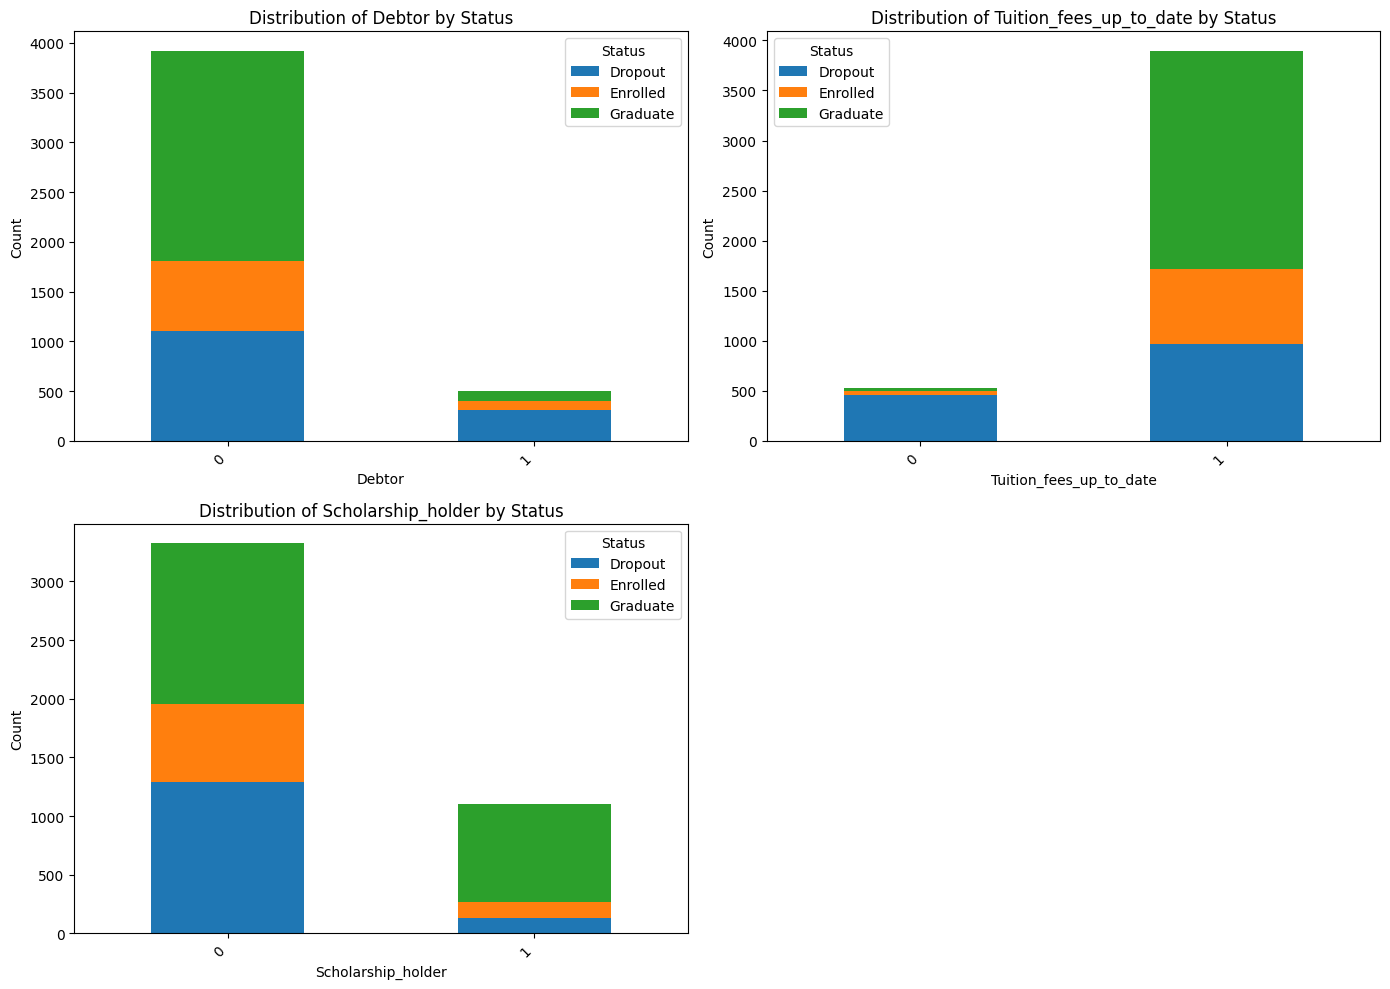

In [15]:
# --- Visualisasi korelasi dropout dengan kolom-kolom terkait latar belakang finansial siswa --- 
# Menentukan fitur-fitur terkait latar belakang keuangan siswa 
financial_features = [
    'Debtor',
    'Tuition_fees_up_to_date',
    'Scholarship_holder'
] 

plot_df = student_data.copy()

# Visualisasi distribusi fitur-fitur terkait latar belakang finansial siswa dengan multiple stacked bar chart  
stack_bar_configurations = []
for col in financial_features:
     if col in plot_df.columns:
        config = {
            'df': plot_df,
            'x_column': col,       
            'stack_column': 'Status',
            'title': f'Distribution of {col} by Status',
            'xlabel': col,
            'ylabel': 'Count'
        }
        stack_bar_configurations.append(config)
     else:
         print(f"Warning: Column '{col}' not found in the DataFrame. Skipping configuration.")


plot_multi_stack_bars(stack_bar_configurations)

Visualisasi stacked bar chart ini menyajikan gambaran menarik mengenai hubungan antara status finansial mahasiswa (status hutang, kelancaran iuran, dan kepemilikan beasiswa) dengan kemungkinan mereka mengalami dropout. Saat kita melihat distribusi dropout pada ketiga fitur ini, sebuah pola yang konsisten dan mencolok muncul: di setiap fitur (debtor, tuition_fees_up_to_date, scholarship_holder), kategori yang paling dominan secara keseluruhan jumlah mahasiswa juga merupakan kategori yang menyumbang angka dropout paling tinggi.

Secara spesifik, jumlah dropout didominasi oleh mahasiswa yang tidak memiliki hutang (debtor 0), mereka yang lancar membayar iuran (tuition_fees_up_to_date 1), dan mereka yang tidak memiliki beasiswa (scholarship_holder 0). Karena sebagian besar mahasiswa memang berada dalam status-status ini, secara otomatis jumlah kasus dropout terbanyak juga ditemukan di sini. Temuan ini mengindikasikan bahwa, setidaknya berdasarkan visualisasi ini, angka absolut dropout tampaknya sangat terkait dengan ukuran populasi siswa dalam kategori status finansial tertentu, bukan selalu menunjukkan tingkat risiko dropout yang lebih tinggi dalam kategori tersebut dibandingkan kategori lainnya.

Pada visualisasi EDA berikutnya di bawah ini, kita akan melihat hubungan antara status siswa (terutama yang Dropout) dengan fitur-fitur terkait application & enrollment dengan memanfaatkan visualisasi stacked bar chart.  

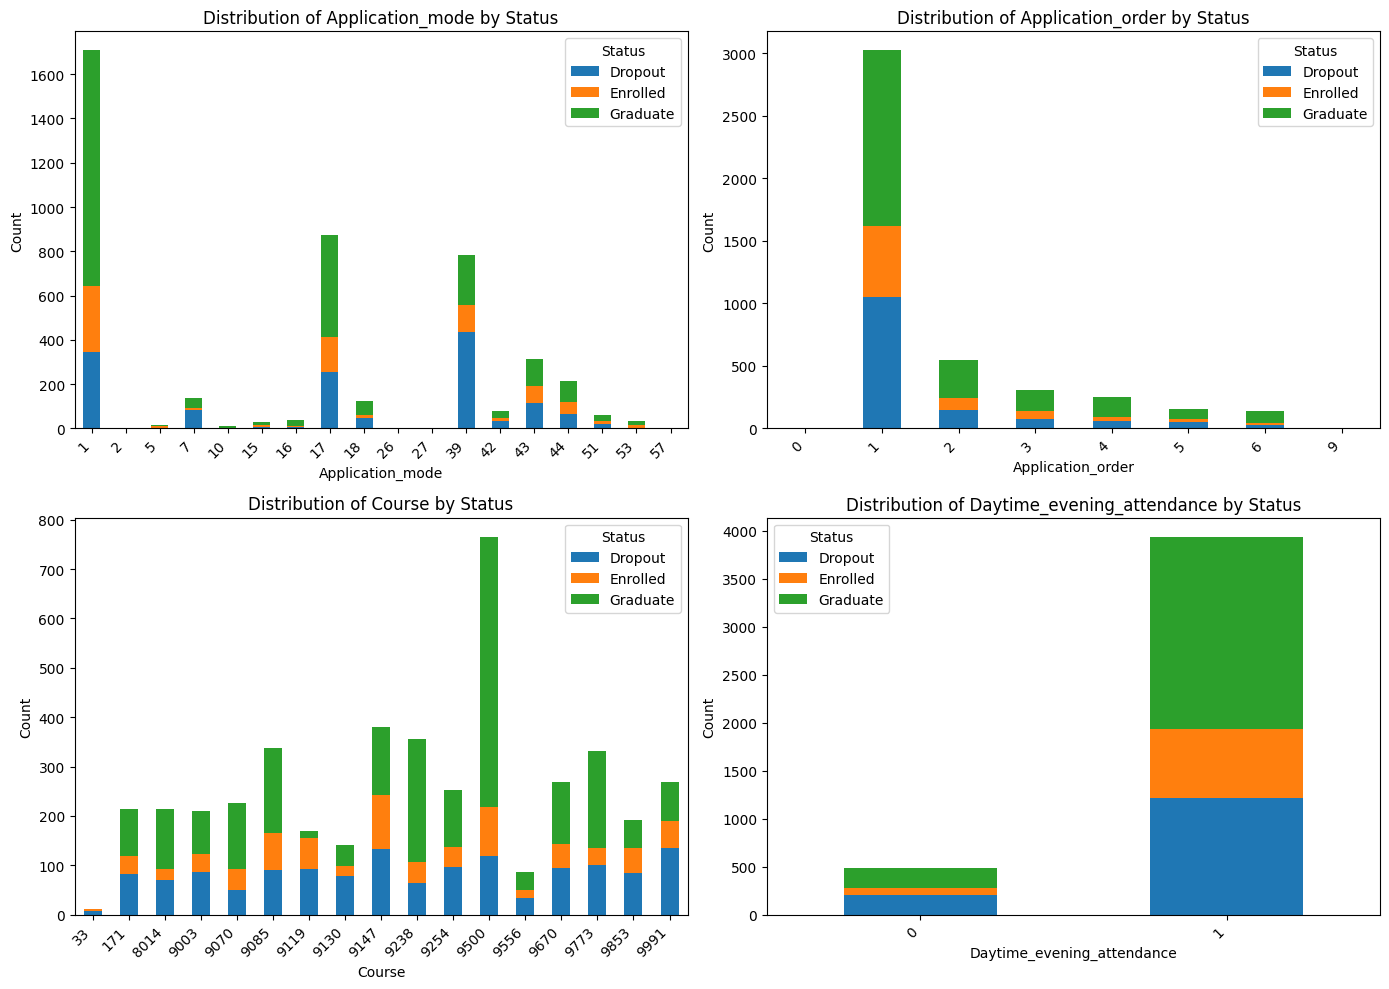

In [16]:
# --- Visualisasi korelasi dropout dengan kolom-kolom terkait application & enrollment ---
# Menentukan fitur-fitur terkait application & enrollment 
application_enrollment_features = [
    'Application_mode',
    'Application_order',
    'Course',
    'Daytime_evening_attendance'
]

plot_df = student_data.copy() 

# Visualisasi distribusi fitur-fitur terkait application & enrollment dengan multiple stacked bar chart  
stack_bar_configurations = []
for col in application_enrollment_features:
     if col in plot_df.columns:
        config = {
            'df': plot_df,
            'x_column': col,       
            'stack_column': 'Status',
            'title': f'Distribution of {col} by Status',
            'xlabel': col,
            'ylabel': 'Count'
        }
        stack_bar_configurations.append(config)
     else:
         print(f"Warning: Column '{col}' not found in the DataFrame. Skipping configuration.")


plot_multi_stack_bars(stack_bar_configurations)

Visualisasi stacked bar chart ini menyajikan gambaran bagaimana status mahasiswa (drop out atau tidak) terdistribusi di berbagai kategori. Saat kita menyoroti salah satu kategori tertentu yang paling menonjol, terlihat sebuah fenomena yang jelas: kategori ini tidak hanya memiliki jumlah total mahasiswa yang paling banyak, namun sejalan dengan itu, jumlah mahasiswa yang memutuskan untuk drop out di kategori ini juga termasuk yang paling tinggi. Pola ini mengindikasikan sebuah tren yang straightforward: semakin besar jumlah total mahasiswa yang terdaftar atau mengambil bagian dalam kategori tertentu, semakin besar pula angka absolut mahasiswa yang kemungkinan akan mengalami drop out di dalamnya. Hal ini menunjukkan bahwa volume mahasiswa dalam sebuah kategori tampak berbanding lurus dengan jumlah kasus drop out yang terjadi di kategori tersebut.

Pada visualisasi EDA berikutnya di bawah ini, kita akan melihat hubungan antara status siswa (terutama yang Dropout) dengan fitur-fitur eksternal (seperti Unemployment_rate, Inflation_rate, dan GDP) dengan memanfaatkan visualisasi box plot.

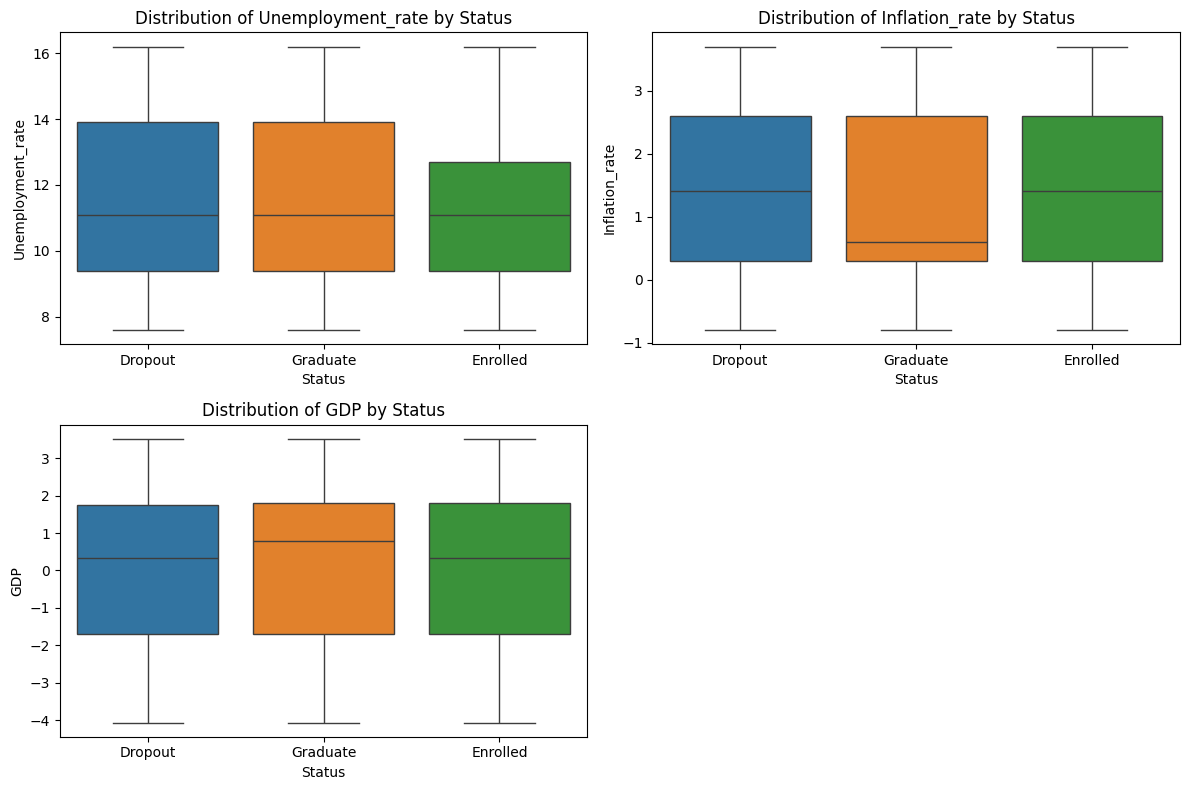

In [17]:
# --- Visualisasi korelasi dropout dengan kolom-kolom terkait faktor eksternal (ekonomi makro) ---
# Menentukan fitur-fitur terkait faktor eksternal (ekonomi makro) 
external_features = [
    'Unemployment_rate',
    'Inflation_rate',
    'GDP'
] 

plot_df = student_data.copy()

# Visualisasi distribusi fitur-fitur terkait faktor eksternal dengan multiple box plot chart 
boxplot_configurations = []
for col in external_features:
    config = {
        'data': plot_df,
        'x_col': 'Status',
        'y_col': col,
        'hue': 'Status',
        'title': f'Distribution of {col} by Status',
        'xlabel': 'Status',
        'ylabel': col
    }
    boxplot_configurations.append(config)


plot_multi_boxplot(boxplot_configurations)

Saat kita membandingkan status-status yang terilustrasikan pada visualisasi di atas, terlihat bahwa nilai median dari Tingkat Inflasi dan GDP yang dialami oleh siswa dengan status berbeda menunjukkan perbedaan yang mencolok. Ini mengisyaratkan bahwa kondisi ekonomi "tipikal" yang dihadapi oleh mahasiswa yang pada akhirnya drop out bisa jadi berbeda dari mereka yang berhasil menyelesaikan studi atau masih berstatus aktif, ditinjau dari aspek inflasi dan pertumbuhan ekonomi.

Namun, cerita yang agak berbeda terlihat pada Tingkat Pengangguran. Meskipun median tingkat pengangguran tampak relatif serupa di antara ketiga status siswa, visualisasi box plot justru menunjukkan perbedaan signifikan pada rentang nilainya. Ini berarti bahwa meskipun tingkat pengangguran rata-rata yang dihadapi oleh berbagai kelompok mahasiswa mungkin tidak jauh berbeda, variabilitas atau sebaran kondisi pengangguran yang mereka alami (misalnya, seberapa ekstrem titik tertinggi atau terendah yang dihadapi kelompok tersebut) bisa jadi sangat bervariasi tergantung pada status akhirnya. Analisis ini menyiratkan bahwa dampak faktor ekonomi makro pada status mahasiswa mungkin termanifestasi tidak hanya pada level rata-rata (mean), tetapi juga pada rentang kondisi yang dialami.

Pada visualisasi EDA terakhir di bawah ini, kita akan melihat hubungan antara status siswa (terutama yang Dropout) dengan fitur-fitur terkait faktor kebutuhan khusus (special needs) siswa dengan memanfaatkan visualisasi stacked bar chart. 

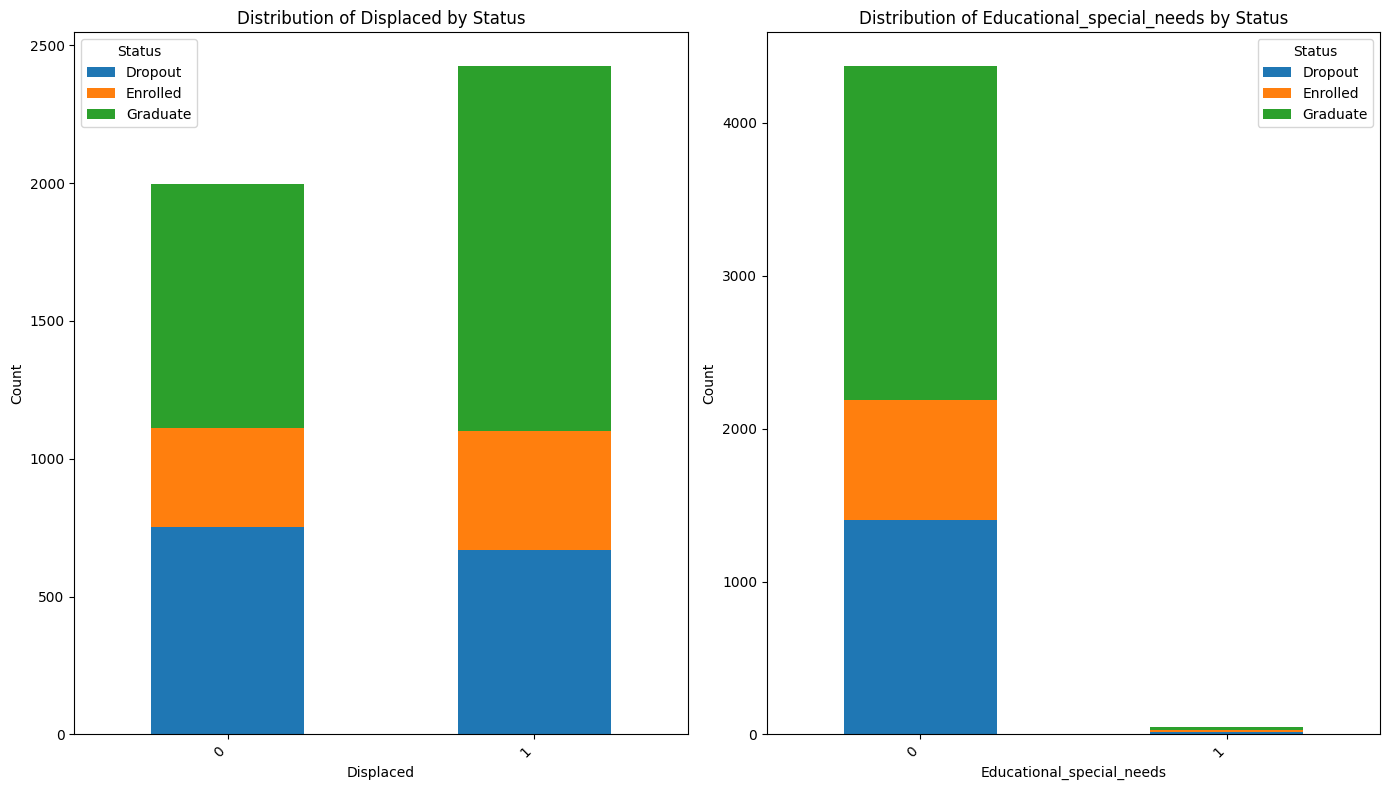

In [18]:
# --- Visualisasi korelasi dropout dengan kolom-kolom terkait faktor kebutuhan khusus (special needs) ---
# Menentukan fitur-fitur terkait faktor kebutuhan khusus (special needs) 
special_needs_features = [
    'Displaced',
    'Educational_special_needs'
] 

plot_df = student_data.copy()

# Visualisasi distribusi fitur-fitur terkait faktor kebutuhan khusus dengan multiple stacked bar chart 
stack_bar_configurations = []
for col in special_needs_features:
     if col in plot_df.columns:
        config = {
            'df': plot_df,
            'x_column': col,       
            'stack_column': 'Status',
            'title': f'Distribution of {col} by Status',
            'xlabel': col,
            'ylabel': 'Count'
        }
        stack_bar_configurations.append(config)
     else:
         print(f"Warning: Column '{col}' not found in the DataFrame. Skipping configuration.")


plot_multi_stack_bars(stack_bar_configurations)

Visualisasi bar chart ini menyajikan wawasan menarik mengenai hubungan antara status dropout dengan dua fitur penting: apakah mahasiswa adalah Displaced (misalnya, harus pindah tempat tinggal untuk studi) dan apakah mereka memiliki Educational_special_needs (kebutuhan pendidikan khusus). Menariknya, pada fitur Displaced, jumlah mahasiswa yang drop out justru lebih rendah pada kelompok yang displaced dibandingkan dengan kelompok yang tidak displaced. Ini mengindikasikan bahwa mahasiswa yang tidak displaced tampaknya menyumbang angka dropout yang lebih besar.

Saat melihat fitur Educational_special_needs, visualisasi menunjukkan tidak terdapat korelasi yang jelas atau peningkatan risiko dropout yang signifikan terkait dengan memiliki kebutuhan pendidikan khusus. Meskipun ada mahasiswa dropout yang memiliki kebutuhan khusus, jumlah mereka meningkat seiring dengan peningkatan jumlah mahasiswa graduate dan enrolled dengan kebutuhan khusus. Bahkan, angka dropout dengan kebutuhan khusus masih lebih rendah dari angka graduate dengan kebutuhan khusus. Ini menyiratkan bahwa memiliki kebutuhan pendidikan khusus tidak secara otomatis mendorong siswa ke arah dropout dibandingkan penyelesaian studi, setidaknya dalam data ini.

# Data Preparation / Preprocessing

## Feature Engineering

Feature engineering yang akan kita lakukan dalam proyek data science kali ini melibatkan pembuatan beberapa fitur baru berdasarkan hasil EDA pada bagian sebelumnya, yaitu approval rate untuk masing-masing semester, overall approval rate, curricular units without evaluation untuk masing-masing semseter, change units without evaluation, overall average grade, overall average grade vs previous qualification, serta overall approved to credited ratio. Selain itu, kita juga akan melakukan visualisasi EDA terhadap fitur-fitur baru ini. 

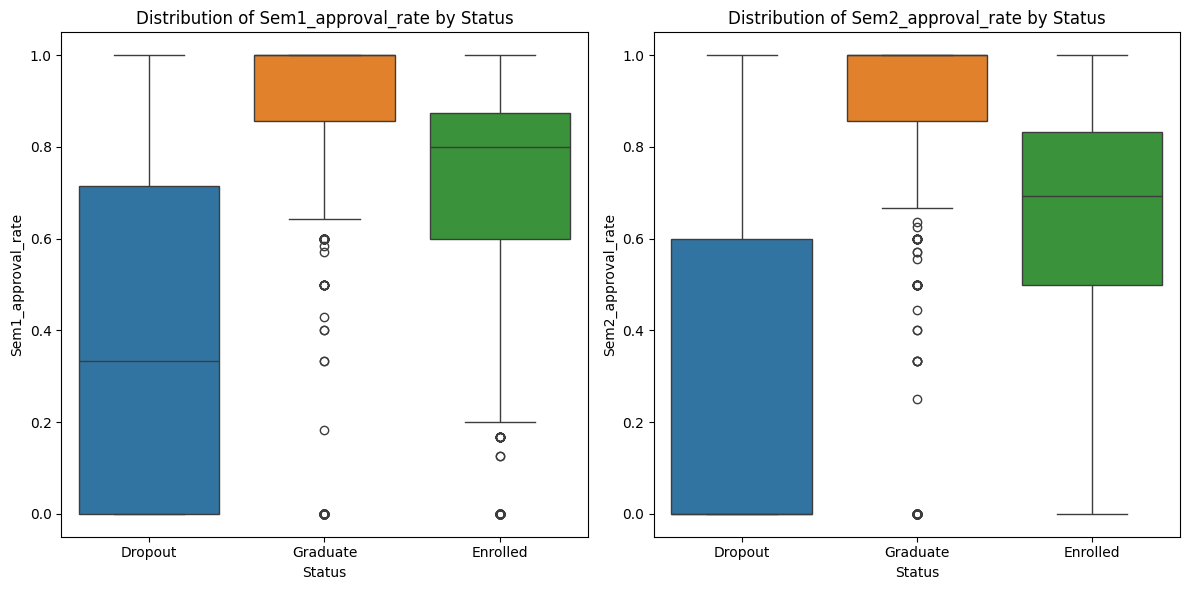

In [19]:
# --- Membuat fitur untuk menghitung approval rate masing-masing semester ---
# Menghitung approval rate semester 1
engineered_student_data = student_data.copy()

engineered_student_data['Sem1_approval_rate'] = engineered_student_data['Curricular_units_1st_sem_approved'] / engineered_student_data['Curricular_units_1st_sem_enrolled'].replace(0, np.nan)
engineered_student_data['Sem1_approval_rate'] = engineered_student_data['Sem1_approval_rate'].fillna(0)

# Menghitung approval rate semester 2
engineered_student_data['Sem2_approval_rate'] = engineered_student_data['Curricular_units_2nd_sem_approved'] / engineered_student_data['Curricular_units_2nd_sem_enrolled'].replace(0, np.nan)
engineered_student_data['Sem2_approval_rate'] = engineered_student_data['Sem2_approval_rate'].fillna(0)

# Visualisasi distribusi fitur Overall_approval_rate dengan box plot
approval_rate_cols = [
    'Sem1_approval_rate',
    'Sem2_approval_rate'
]

boxplot_configurations = []
for col in approval_rate_cols:
    config = {
        'data': engineered_student_data,
        'x_col': 'Status',
        'y_col': col,
        'hue': 'Status',
        'title': f'Distribution of {col} by Status',
        'xlabel': 'Status',
        'ylabel': col
    }
    boxplot_configurations.append(config)


plot_multi_boxplot(boxplot_configurations)

Visualisasi distribusi 'Sem1_approval_rate' dan 'Sem2_approval_rate' berdasarkan 'Status' siswa di atas dengan box plot menunjukkan bahwa terdapat perbedaan signifikan di antara siswa yang dropout dengan yang tidak dropout. Siswa dropout dalam konteks ini memiliki nilai approval rate untuk masing-masing semester di bawah 0.6, berbeda dengan siswa tidak dropout (Graduate dan Enrolled) yang memiliki nilai approval rate per semester setidaknya di atas 0.5 dengan pengecualian outlier pada kedua kategori ini. Outlier ini akan kita tangani nanti. 

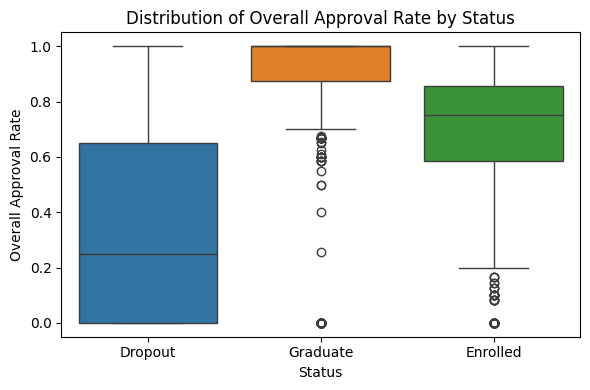

In [20]:
# --- Membuat fitur untuk menghitung overall approval rate --- 
# Membuat kolom bernama 'Overall_approval_rate' 
engineered_student_data['Overall_approval_rate'] = ((engineered_student_data['Sem1_approval_rate'] + engineered_student_data['Sem2_approval_rate']) / 2).replace(0, np.nan)
engineered_student_data['Overall_approval_rate'] = engineered_student_data['Overall_approval_rate'].fillna(0)

# Visualisasi distribusi fitur Overall_approval_rate dengan box plot
plt.figure(figsize=(6, 4))

plot_boxplot(
    data=engineered_student_data,        
    x_col='Status',             
    y_col='Overall_approval_rate',  
    hue='Status', 
    title='Distribution of Overall Approval Rate by Status',
    xlabel='Status',
    ylabel='Overall Approval Rate'
)

plt.tight_layout() 
plt.show() 

Visualisasi distribusi 'Overall_approval_rate' berdasarkan 'Status' siswa di atas dengan box plot menunjukkan bahwa terdapat perbedaan signifikan di antara siswa yang dropout dengan yang tidak dropout. Siswa dropout dalam konteks ini memiliki nilai overal approval rate di bawah 0.6, berbeda dengan siswa tidak dropout (Graduate dan Enrolled) yang memiliki nilai approval rate per semester setidaknya di atas 0.6 dengan pengecualian outlier pada kedua kategori ini. Outlier ini akan kita tangani nanti. 

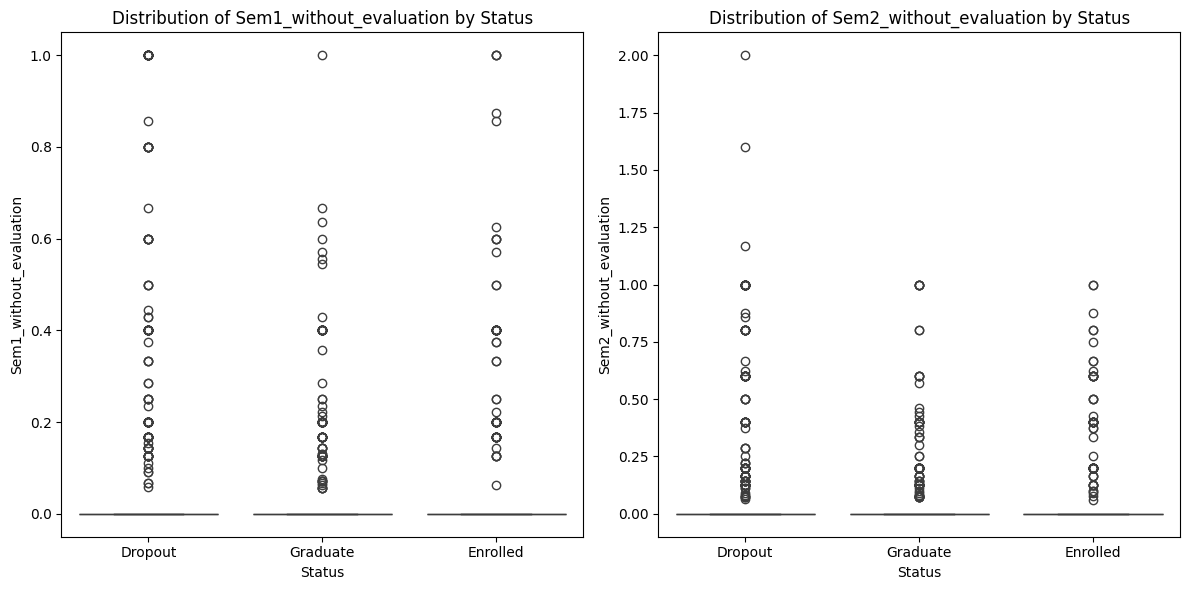

In [21]:
# --- Membuat fitur untuk menghitung curricular units without evaluation untuk masing-masing semester ---
# Menghitung semester units without evaluation untuk semester 1
engineered_student_data['Sem1_without_evaluation'] = engineered_student_data['Curricular_units_1st_sem_without_evaluations'] / engineered_student_data['Curricular_units_1st_sem_enrolled'].replace(0, np.nan)
engineered_student_data['Sem1_without_evaluation'] = engineered_student_data['Sem1_without_evaluation'].fillna(0)

# Menghitung semester units without evaluation untuk semester 1
engineered_student_data['Sem2_without_evaluation'] = engineered_student_data['Curricular_units_2nd_sem_without_evaluations'] / engineered_student_data['Curricular_units_2nd_sem_enrolled'].replace(0, np.nan)
engineered_student_data['Sem2_without_evaluation'] = engineered_student_data['Sem2_without_evaluation'].fillna(0)

# Visualisasi distribusi fitur 'Sem1_without_evaluation' dan 'Sem2_without_evaluation' dengan box plot
overall_without_evaluation_cols = [
    'Sem1_without_evaluation',
    'Sem2_without_evaluation'
]

boxplot_configurations = []
for col in overall_without_evaluation_cols:
    config = {
        'data': engineered_student_data,
        'x_col': 'Status',
        'y_col': col,
        'hue': 'Status',
        'title': f'Distribution of {col} by Status',
        'xlabel': 'Status',
        'ylabel': col
    }
    boxplot_configurations.append(config)


plot_multi_boxplot(boxplot_configurations)

Visualisasi distribusi 'Sem1_without_evaluation' dan 'Sem2_without_evaluation' berdasarkan 'Status' siswa di atas dengan box plot menunjukkan bahwa tidak terdapat korelasi yang jelas di antara 'Sem1_without_evaluation' dan 'Sem2_without_evaluation' dengan status akhir siswa (Dropout atau tidak Dropout), ditandai dengan hanya berisikan titik-titik persebaran data tanpa adanya kotak yang mewakili nilai kuartil dan median. 

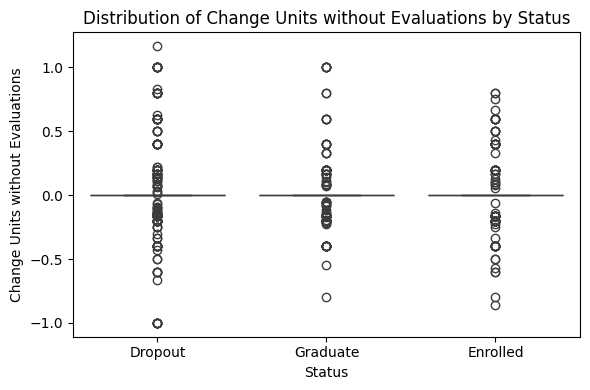

In [22]:
# --- Membuat fitur untuk menghitung Change Units without Evaluations --- 
# Membuat kolom bernama 'Change_units_without_evaluations'
engineered_student_data['Change_units_without_evaluations'] = engineered_student_data['Sem2_without_evaluation'] - engineered_student_data['Sem1_without_evaluation']

# Visualisasi distribusi fitur 'Change_units_without_evaluations' dengan box plot
plt.figure(figsize=(6, 4))

plot_boxplot(
    data=engineered_student_data,        
    x_col='Status',             
    y_col='Change_units_without_evaluations',  
    hue='Status', 
    title='Distribution of Change Units without Evaluations by Status',
    xlabel='Status',
    ylabel='Change Units without Evaluations'
)

plt.tight_layout() 
plt.show() 

Sama halnya seperti visualisasi distribusi 'Sem1_without_evaluation' dan 'Sem2_without_evaluation' berdasarkan 'Status' siswa sebelumnya, visualisasi di atas dengan box plot juga menunjukkan tidak adanya korelasi yang jelas di antara 'Change_units_without_evaluation' dengan status akhir siswa (Dropout atau tidak Dropout), ditandai dengan hanya berisikan titik-titik persebaran data tanpa adanya kotak yang mewakili nilai kuartil dan median. 

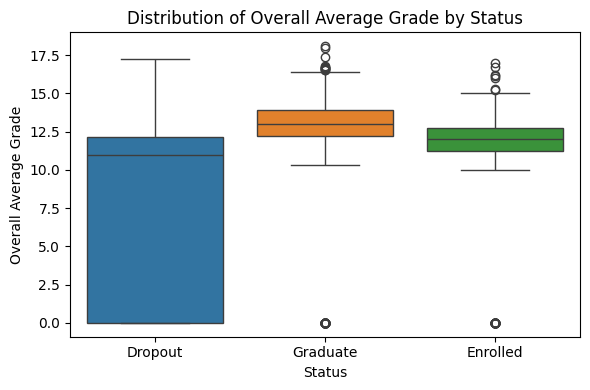

In [23]:
# --- Membuat fitur untuk menghitung overall average grade --- 
# Membuat kolom bernama 'Overall_average_grade'
weighted_grade_sum = (engineered_student_data['Curricular_units_1st_sem_grade'] * engineered_student_data['Curricular_units_1st_sem_approved']) + \
                         (engineered_student_data['Curricular_units_2nd_sem_grade'] * engineered_student_data['Curricular_units_2nd_sem_approved'])

total_approved = engineered_student_data['Curricular_units_1st_sem_approved'] + engineered_student_data['Curricular_units_2nd_sem_approved']

engineered_student_data['Overall_average_grade'] = weighted_grade_sum / total_approved.replace(0, np.nan)

engineered_student_data['Overall_average_grade'] = engineered_student_data['Overall_average_grade'].fillna(0)

# Visualisasi distribusi fitur Overall_average_grade dengan box plot
plt.figure(figsize=(6, 4))

plot_boxplot(
    data=engineered_student_data,        
    x_col='Status',             
    y_col='Overall_average_grade',  
    hue='Status', 
    title='Distribution of Overall Average Grade by Status',
    xlabel='Status',
    ylabel='Overall Average Grade'
)

plt.tight_layout() 
plt.show() 

Visualisasi distribusi 'Overall_average_grade' berdasarkan 'Status' siswa di atas dengan box plot menunjukkan bahwa terdapat perbedaan signifikan di antara siswa yang dropout dengan yang tidak dropout. Dalam konteks ini, siswa yang dropout dominannya memiliki nilai Overall_average_grade di bawah 12.5, di mana hal ini kontras dengan dua kategori lain (Graduate & Enrolled) dengan masing-masing memiliki nilai Overall_average_grade secara dominan di antara 11 - 14. 

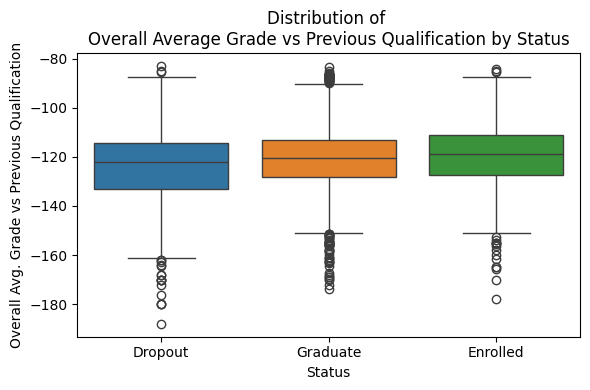

In [24]:
# --- Membuat fitur untuk membandingkan Overall Average Grade dengan Previous Qualification Grade --- 
# Membuat kolom bernama 'Grade_vs_prev_qual'
engineered_student_data['Grade_vs_prev_qual'] = engineered_student_data['Overall_average_grade'] - engineered_student_data['Previous_qualification_grade']

# Visualisasi distribusi fitur 'Grade_vs_prev_qual' dengan box plot
plt.figure(figsize=(6, 4))

plot_boxplot(
    data=engineered_student_data,        
    x_col='Status',             
    y_col='Grade_vs_prev_qual',  
    hue='Status', 
    title='Distribution of \nOverall Average Grade vs Previous Qualification by Status',
    xlabel='Status',
    ylabel='Overall Avg. Grade vs Previous Qualification'
)

plt.tight_layout() 
plt.show() 

Visualisasi distribusi 'Grade_vs_prev_qual' berdasarkan 'Status' siswa di atas dengan box plot menunjukkan bahwa terdapat tidak korelasi yang jelas di antara 'Grade_vs_prev_qual' dengan status akhir siswa (Dropout atau tidak Dropout). Dalam konteks ini, nilai median dan interkuartil dari ketiga kategori 'Status' akhir siswa tidak mengalami perbedaan signifikan (atau masih dalam rentang margin of error) dan sama-sama memiliki outlier yang cukup signifikan. 

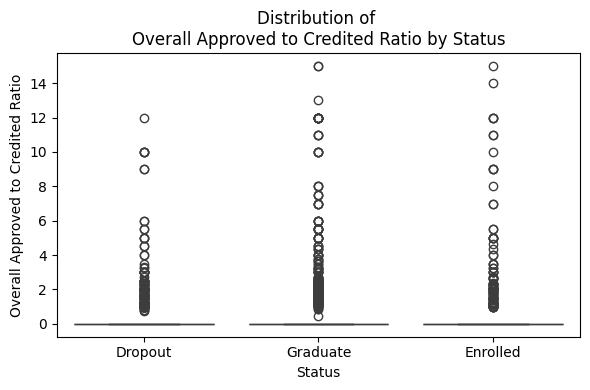

In [25]:
# --- Membuat fitur untuk menghitung Overall Approved to Credited Ratio --- 
# Menghitung rasio untuk semester 1
engineered_student_data['Sem1_approved_to_credited_ratio'] = engineered_student_data['Curricular_units_1st_sem_approved'] / engineered_student_data['Curricular_units_1st_sem_credited'].replace(0, np.nan)
engineered_student_data['Sem1_approved_to_credited_ratio'] = engineered_student_data['Sem1_approved_to_credited_ratio'].fillna(0)

# Menghitung rasio untuk semester 2
engineered_student_data['Sem2_approved_to_credited_ratio'] = engineered_student_data['Curricular_units_2nd_sem_approved'] / engineered_student_data['Curricular_units_2nd_sem_credited'].replace(0, np.nan)
engineered_student_data['Sem2_approved_to_credited_ratio'] = engineered_student_data['Sem1_approved_to_credited_ratio'].fillna(0)

# Menghitung 'total_approved' dan 'total_credited'
total_approved = engineered_student_data['Curricular_units_1st_sem_approved'] + engineered_student_data['Curricular_units_2nd_sem_approved']
total_credited = engineered_student_data['Curricular_units_1st_sem_credited'] + engineered_student_data['Curricular_units_2nd_sem_credited']

# Menghitung 'Overall_approved_to_credited_ratio' 
engineered_student_data['Overall_approved_to_credited_ratio'] = total_approved / total_credited.replace(0, np.nan)
engineered_student_data['Overall_approved_to_credited_ratio'] = engineered_student_data['Overall_approved_to_credited_ratio'].fillna(0)

# Visualisasi distribusi fitur 'overall_approved_to_credited_ratio' dengan box plot
plt.figure(figsize=(6, 4))

plot_boxplot(
    data=engineered_student_data,        
    x_col='Status',             
    y_col='Overall_approved_to_credited_ratio',  
    hue='Status', 
    title='Distribution of \nOverall Approved to Credited Ratio by Status',
    xlabel='Status',
    ylabel='Overall Approved to Credited Ratio'
)

plt.tight_layout() 
plt.show() 

Visualisasi distribusi 'Overall_approved_to_credited_ratio' berdasarkan 'Status' siswa di atas dengan box plot menunjukkan bahwa tidak terdapat korelasi yang jelas di antara 'Overall_approved_to_credited_ratio' dengan status akhir siswa (Dropout atau tidak Dropout), ditandai dengan hanya berisikan titik-titik persebaran data tanpa adanya kotak yang mewakili nilai kuartil dan median. 

Setelah selesai melakukan feature engineering dengan membuat beberapa fitur baru terkait kinerja secara keseluruhan terhadap setiap siswa, tahapan berikutnya adalah melakukan visualisasi correlation matrix secara high-fidelity terhadap fitur-fitur numerik (existing dan hasil feature engineering) dengan bantuan heat map. 

- Overall_approval_rate dan Sem2_approval_rate: 0.9692

- Curricular_units_1st_sem_grade dan Overall_average_grade: 0.9662

- Sem1_approval_rate dan Overall_approval_rate: 0.9661

- Curricular_units_2nd_sem_without_evaluations dan Sem2_without_evaluation: 0.9517

- Curricular_units_1st_sem_credited dan Curricular_units_2nd_sem_credited: 0.9448

- Curricular_units_2nd_sem_enrolled dan Curricular_units_1st_sem_enrolled: 0.9426

- Curricular_units_2nd_sem_approved dan Curricular_units_1st_sem_approved: 0.9040

- Curricular_units_1st_sem_without_evaluations dan Sem1_without_evaluation: 0.8898

- Overall_approval_rate dan Curricular_units_2nd_sem_grade: 0.8861

- Curricular_units_2nd_sem_grade dan Overall_average_grade: 0.8783

- Sem2_approval_rate dan Curricular_units_2nd_sem_grade: 0.8783

- Sem1_approval_rate dan Sem2_approval_rate: 0.8728

- Sem2_approval_rate dan Curricular_units_2nd_sem_approved: 0.8681

- Curricular_units_1st_sem_grade dan Sem1_approval_rate: 0.8663

- Overall_averag

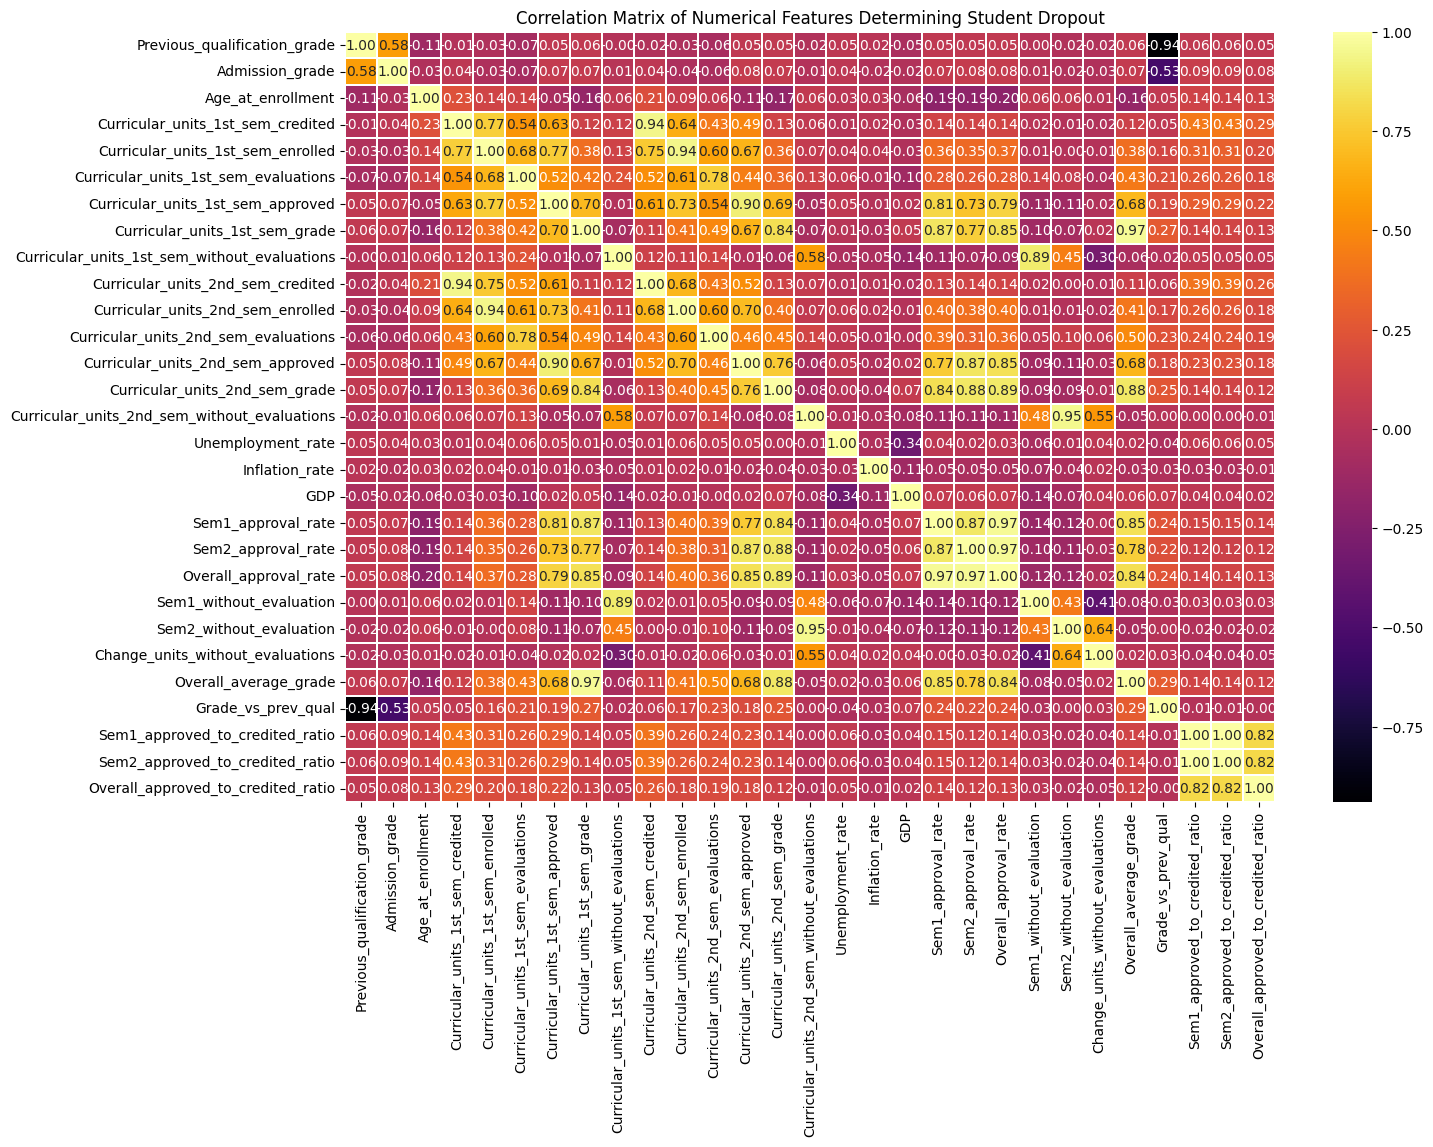

In [26]:
#  --- Visualisasi korelasi dropout dengan fitur-fitur numerik  ---
# Mendefinisikan correlation matrix untuk fitur-fitur numerik saja  
cat_cols = []
for i in engineered_student_data.columns:
    if engineered_student_data[i].nunique() <= 5 or engineered_student_data[i].dtype == 'object':
        cat_cols.append(i) 

plot_df = engineered_student_data.copy()
plot_df = plot_df.drop(columns=cat_cols, errors='ignore')

corr_mat = plot_df.corr()
unstacked_corr = corr_mat.unstack()

# Mendefinisikan variabel korelasi positif kuat (di atas 0.6)
strong_pos_corr = unstacked_corr[
    (unstacked_corr >= 0.6) & (unstacked_corr < 1.0)
    ].sort_values(ascending=False)

# Mendefinisikan variabel korelasi negatif kuat (di bawah -0.6) 
strong_neg_corr = unstacked_corr[
    (unstacked_corr <= -0.6) & (unstacked_corr > -1.0)
    ].sort_values(ascending=False)

# Visualisasi correlation matrix menggunakan heatmap 
printed_pairs = set()

for(col1, col2), corr_value in strong_pos_corr.items():
    pair = tuple(sorted([col1, col2]))

    if pair not in printed_pairs:
        print(f"- {col1} dan {col2}: {corr_value:.4f}\n")
        printed_pairs.add(pair)

for(col1, col2), corr_value in strong_neg_corr.items():
    pair = tuple(sorted([col1, col2]))

    if pair not in printed_pairs:
        print(f"- {col1} dan {col2}: {corr_value:.4f}\n")
        printed_pairs.add(pair)

plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, cmap='inferno', fmt=".2f", linewidths=-.05)
plt.title('Correlation Matrix of Numerical Features Determining Student Dropout')
plt.show()

Analisis korelasi antara berbagai metrik akademik siswa mengungkap cerita mendalam tentang konsistensi, saling keterkaitan, dan beberapa hubungan penting dalam perjalanan studi mereka. Pola yang paling dominan dan menunjukkan hubungan paling kuat (dengan korelasi di atas 0.96) adalah antara metrik rata-rata keseluruhan dengan metrik di semester kedua, seperti Overall_approval_rate dengan Sem2_approval_rate (0.9692) dan Curricular_units_1st_sem_grade dengan Overall_average_grade (0.9662), serta konsistensi approval rate dari semester pertama ke keseluruhan (Sem1_approval_rate dengan Overall_approval_rate (0.9661)). Ini secara jelas menunjukkan bahwa performa dan tingkat penyelesaian di semester awal dan terutama semester kedua sangat mencerminkan hasil rata-rata keseluruhan. Selain itu, terlihat juga konsistensi yang sangat tinggi antar-semester untuk metrik raw unit counts/approvals/grades, dengan korelasi di atas 0.90 untuk unit yang diakui, didaftarkan, dan disetujui, serta korelasi kuat 0.8372 untuk nilai rata-rata (Curricular_units_1st_sem_grade vs Curricular_units_2nd_sem_grade). Metrik-metrik dalam satu semester juga saling terkait erat (misalnya, unit didaftarkan dengan disetujui atau nilai), dan ada korelasi signifikan (di atas 0.6) antara metrik lintas-semester. Namun, analisis juga mengungkap hubungan yang sangat kuat namun bersifat negatif. Terdapat korelasi -0.9396 antara Previous_qualification_grade (nilai kualifikasi sebelumnya) dengan Grade_vs_prev_qual (perbedaan nilai studi saat ini dengan kualifikasi sebelumnya). Angka negatif yang tinggi ini mengindikasikan bahwa semakin tinggi nilai kualifikasi sebelumnya seorang mahasiswa, semakin rendah selisih nilai akademiknya saat ini dibandingkan kualifikasi sebelumnya tersebut, menyiratkan adanya potensi tantangan dalam transisi dari pendidikan sebelumnya bagi beberapa siswa. Secara keseluruhan, data korelasi ini mengilustrasikan gambaran tentang adanya momentum dan keterkaitan akademik yang kuat dari semester ke semester dan ke hasil keseluruhan, tetapi juga menyoroti hubungan invers yang signifikan terkait nilai kualifikasi awal mahasiswa.

Namun, saat kita memperluas pandangan ke seluruh fitur dalam dataset ini, analisis korelasi menunjukkan variasi yang lebih luas, mulai dari nilai negatif hingga positif. Variasi ini merupakan indikasi adanya multikolinearitas pada sebagian fitur, yaitu kondisi di mana terdapat hubungan linear yang kuat antara variabel prediktor satu sama lain. Multikolinearitas ini penting dikenali karena dapat mempengaruhi stabilitas model machine learning dan interpretasi hasil. Oleh karena itu, keberadaan multikolinearitas ini memerlukan tindakan prapemrosesan lanjutan, yang akan kita lakukan selanjutnya.

### Dataframe Checking After Feature Engineering

Setelah melalui proses feature engineering, kita coba memeriksa kembali isi nilai dari dataframe 'engineered_student_data' dengan menggunakan fungsi 'display(engineered_student_data)' serta melihat gambaran statistik dari dataframe dengan menggunakan fungsi 'engineered_student_data.describe().T'

In [27]:
# --- Memeriksa kembali isi dataframe 'engineered_student_data' setelah dilakukan feature engineering ---
# Melihat isi nilai dalam dataframe secara keseluruhan
display(engineered_student_data)

# Melihat gambaran statistik dalam dataframe
engineered_student_data.describe().T

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,...,Sem2_approval_rate,Overall_approval_rate,Sem1_without_evaluation,Sem2_without_evaluation,Change_units_without_evaluations,Overall_average_grade,Grade_vs_prev_qual,Sem1_approved_to_credited_ratio,Sem2_approved_to_credited_ratio,Overall_approved_to_credited_ratio
0,1,17,5,171,1,1,122.0,1,19,12,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,-122.000000,0.0,0.0,0.0
1,1,15,1,9254,1,1,160.0,1,1,3,...,1.000000,1.000000,0.0,0.0,0.0,13.833333,-146.166667,0.0,0.0,0.0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,-122.000000,0.0,0.0,0.0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0.833333,0.916667,0.0,0.0,0.0,12.961039,-109.038961,0.0,0.0,0.0
4,2,39,1,8014,0,1,100.0,1,37,38,...,1.000000,0.916667,0.0,0.0,0.0,12.696970,-87.303030,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0.833333,0.833333,0.0,0.0,0.0,13.133333,-111.866667,0.0,0.0,0.0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0.333333,0.666667,0.0,0.0,0.0,11.750000,-108.250000,0.0,0.0,0.0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0.125000,0.562500,0.0,0.0,0.0,14.735938,-139.264062,0.0,0.0,0.0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,1.000000,1.000000,0.0,0.0,0.0,12.900000,-167.100000,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.000000,133.100000,140.000000,190.000000
Admission_grade,4424.0,126.978119,14.482001,95.00,117.900000,126.100000,134.800000,190.000000
Age_at_enrollment,4424.0,23.265145,7.587816,17.00,19.000000,20.000000,25.000000,70.000000
Curricular_units_1st_sem_credited,4424.0,0.709991,2.360507,0.00,0.000000,0.000000,0.000000,20.000000
Curricular_units_1st_sem_enrolled,4424.0,6.270570,2.480178,0.00,5.000000,6.000000,7.000000,26.000000
Curricular_units_1st_sem_evaluations,4424.0,8.299051,4.179106,0.00,6.000000,8.000000,10.000000,45.000000
Curricular_units_1st_sem_approved,4424.0,4.706600,3.094238,0.00,3.000000,5.000000,6.000000,26.000000
Curricular_units_1st_sem_grade,4424.0,10.640822,4.843663,0.00,11.000000,12.285714,13.400000,18.875000
Curricular_units_1st_sem_without_evaluations,4424.0,0.137658,0.690880,0.00,0.000000,0.000000,0.000000,12.000000
Curricular_units_2nd_sem_credited,4424.0,0.541817,1.918546,0.00,0.000000,0.000000,0.000000,19.000000


## Export Dataframe as .csv File for Visualizatiom

Kita bisa menyimpan dataframe 'engineered_student_data' sebagai sebuah file .csv di penyimpanan lokal untuk digunakan dalam pembuatan business dashboard dengan Tableau Public ataupun Metabase. Kita akan menggunakan Tableau Public sebagai alat dalam pembuatan business dashboard dalam proyek data science kali ini. 

In [28]:
# --- Mengekspor dataframe 'student_df' sebagai file .csv ---
# Menyiapkan direktori file untuk menyimpan file .csv
file_path = 'student.csv'

# Menyimpan dataframe 'student_df' sebagai file .csv untuk kebutuhan visualisasi Tableau Public
try: 
    engineered_student_data.to_csv(file_path, index=False)
    print(f"File {file_path} telah berhasil disimpan.")
except Exception as e:
    print(f"\nGagal menyimpan file {file_path}: {e}")

File student.csv telah berhasil disimpan.


## Handling Variances

Fitur yang tidak memiliki varians sangat mempengaruhi kinerja dari pemodelan data dengan machine learning pada nantinya. Untuk itu kita perlu memeriksa dataframe 'engineered_student_data' apakah terdapat fitur tanpa varians atau tidak. Apabila terdapat fitur tanpa varians, kita perlu menghilangkannya dari dataframe. 

In [29]:
# --- Handling Variances ---
# Memeriksa variabel/fitur yang tidak memiliki varians (zero variance)
norm_df = engineered_student_data.copy()
for i in norm_df[cat_cols]:
    norm_df[i]=pd.factorize(norm_df[i])[0]

# Konversi kolom ke kategori
for i in engineered_student_data[cat_cols]:
    if i=='Status':
        continue
    engineered_student_data[i] = pd.Categorical(engineered_student_data[i])

variances = norm_df.var(numeric_only=True)

# Melakukan penghilangan variabel/fitur yang tidak memiliki varians (zero variance)
zero_variance_cols = variances[variances == 0].index.tolist()
cols_to_drop = zero_variance_cols  

engineered_student_data = engineered_student_data.drop(columns=cols_to_drop, errors='ignore')

print("Variabel atau fitur dengan nol varians:", zero_variance_cols)
student_df = engineered_student_data.copy() 
print(f"Terdapat sebanyak {student_df.shape[1]} kolom dan {student_df.shape[0]} baris dalam dataframe ini.")

Variabel atau fitur dengan nol varians: []
Terdapat sebanyak 48 kolom dan 4424 baris dalam dataframe ini.


Setelah kita menjalankan kode di atas, ditemukan bahwa tidak terdapat satu pun variabel atau fitur dengan nol varians, yang berarti setiap kolom data kita bervariasi dan berpotensi membawa informasi. Selain itu, dataframe 'student_df' yang akan kita gunakan memiliki dimensi 48 kolom dan 4424 baris (observasi), menunjukkan struktur data yang siap untuk analisis lebih lanjut.

## Handling Skewing in Variables

Dalam langkah penting persiapan data untuk pemodelan, kita akan memeriksa distribusi setiap fitur numerik. Untuk mengukur tingkat kemiringan ini, nilai skewness digunakan dengan menetapkan ambang batas 0.66 sebagai indikator kemiringan yang signifikan. Apabila terdapat salah satu atau lebih fitur dengan nilai skewness melebihi ambang batas ini, log-transformation akan dijalankan terhadap fitur tersebut untuk mencegah nilai skewness yang ekstrem. 

In [30]:
# --- Handling Variable Skewing ---
# Memeriksa variabel/fitur dengan skew melebihi 0.66
student_df = engineered_student_data.copy()
MAX_SKEW_THRESHOLD = 0.66 
skew_vals = student_df.skew(numeric_only=True)
skewed_cols_df = pd.DataFrame(skew_vals[(abs(skew_vals) > MAX_SKEW_THRESHOLD) & (skew_vals.index != 'Status')],
                 columns=['Skew']).sort_values(
                 by=['Skew'], ascending=False)

# Melakukan log-transformation pada variabel yang memiliki skew melebihi 0.66
display(skewed_cols_df.style.set_caption('Variabel atau fitur yang akan dilakukan log-transformation:'))

for col in skewed_cols_df.index:
    student_df[col] = np.log1p(student_df[col])
    student_df[col] = student_df[col].replace([np.inf, -np.inf], np.nan)
    student_df[col] = student_df[col].fillna(0)

,Skew
Curricular_units_1st_sem_without_evaluations,8.207403
Curricular_units_2nd_sem_without_evaluations,7.267701
Sem2_without_evaluation,6.728533
Sem1_without_evaluation,6.398062
Overall_approved_to_credited_ratio,5.920974
Curricular_units_2nd_sem_credited,4.634820
Sem1_approved_to_credited_ratio,4.207210
Sem2_approved_to_credited_ratio,4.207210
Curricular_units_1st_sem_credited,4.169049
Age_at_enrollment,2.054988


Dari hasil analisis dengan menjalankan kode di atas, terlihat bahwa banyak fitur numerik, baik yang raw maupun hasil feature engineering seperti jumlah unit tanpa evaluasi di kedua semester dan total (Curricular_units/SemX_without_evaluations), unit yang diakui (Curricular_units_1st/2nd_sem_credited), rasio unit yang disetujui terhadap yang diakui (SemX/Overall_approved_to_credited_ratio), serta usia saat mendaftar (Age_at_enrollment), menunjukkan nilai skewness positif yang tinggi, bahkan ada yang mencapai di atas 8. Kemiringan yang tinggi ini menandakan distribusi data yang sangat terkonsentrasi di satu sisi, menunjukkan kemiringan yang ekstrem. Untuk mengatasi distribusi yang miring ini dan membuatnya lebih simetris—sehingga lebih sesuai dan efektif untuk banyak algoritma machine learning yang mengasumsikan distribusi lebih normal—implementasi log-transformation dilakukan pada fitur-fitur tersebut. Transformasi ini merupakan langkah krusial untuk memastikan data input model menjadi lebih stabil dan memungkinkan model untuk belajar dari pola data dengan lebih baik, meningkatkan potensi akurasi prediksi.

## Hypothesis Testing

Pengujian hipotesis dalam proyek data science kali ini ditujukan untuk mengetahui korelasi antara fitur 'Status' siswa dengan semua fitur yang ada dalam dataset kinerja siswa ini dalam sudut pandang statistik. Pengujian ini melibatkan uji regresi logistik multivariate untuk melihat korelasi antara 'Status' dengan fitur numerik dan uji chi-square untuk melihat korelasi antara 'Status' dengan fitur kategorikal serta mengidentifikasi pasangan fitur yang sifatnya independen. 

### Multiple Logistic Regression Test
**H0 (Hipotesis Nol):** 
Tidak terdapat hubungan statistik yang signifikan antara variabel-variabel Age_at_enrollment, Application_order, Overall_approval_rate, Overall_average_grade, Overall_approved_to_credited_ratio, Grade_vs_prev_qual, dan Change_units_without_evaluations dengan Status Dropout siswa (yaitu, secara kolektif, koefisien regresi logistik untuk variabel-variabel ini tidak berbeda signifikan dari nol).

**H1 (Hipotesis Alternatif):** 
Terdapat hubungan statistik yang signifikan antara setidaknya satu dari variabel-variabel Age_at_enrollment, Application_order, Overall_approval_rate, Overall_average_grade, Overall_approved_to_credited_ratio, Grade_vs_prev_qual, dan Change_units_without_evaluations dengan Status Dropout siswa (yaitu, setidaknya satu koefisien regresi logistik untuk variabel-variabel ini berbeda signifikan dari nol).rage_grade, Overall_approved_to_credited_ratio, Grade_vs_prev_qual, dan Change_units_without_evaluations dengan Status Dropout siswa 

In [31]:
# --- Melakukan uji regresi logistik multivariate --- 
# Reformatting tipe data kolom 'Status' menjadi numerik 
test_student_df = student_df.copy() 
test_student_df['Status'] = test_student_df['Status'].astype('category').cat.codes

# Definisi variabel independen dan dependen 
independent_vars = [
    'Age_at_enrollment', 
    'Overall_approval_rate', 
    'Overall_average_grade', 
    'Overall_approved_to_credited_ratio',
    'Grade_vs_prev_qual',
    'Change_units_without_evaluations'
]
dependent_var = 'Status' 

# Definisi variabel X dan y 
X = test_student_df[independent_vars]
y = test_student_df[dependent_var] 

# Instansiasi dan pengujian model uji regresi linear 
log_reg = LogisticRegression(solver='liblinear', random_state=126, multi_class='ovr')
log_reg.fit(X, y)

# Menampilkan hasil uji regresi linear banyak variabel 
print("Multivariate Linear Regression Results:")
print("Intercept:")
for i, class_label in enumerate(log_reg.classes_):
    print(f"  Class {class_label} vs Rest: {log_reg.intercept_[i]:.2f}")
print("\nCoefficients:")
if log_reg.coef_.ndim == 1: 
    for feature, coef in zip(independent_vars, log_reg.coef_):
        print(f"  {feature}: {coef:.2f}")
else: 
    for i, class_coefs in enumerate(log_reg.coef_):
        class_label = log_reg.classes_[i]  
        print(f"  Class {class_label} vs Rest:")
        for feature, coef in zip(independent_vars, class_coefs):
            print(f"    {feature}: {coef:.2f}")
    
acc_score = log_reg.score(X, y)
print(f"\nAccuracy score: {acc_score * 100:.2f}")

Multivariate Linear Regression Results:
Intercept:
  Class 0 vs Rest: -1.75
  Class 1 vs Rest: 0.81
  Class 2 vs Rest: -0.39

Coefficients:
  Class 0 vs Rest:
    Age_at_enrollment: 1.53
    Overall_approval_rate: -8.56
    Overall_average_grade: 0.72
    Overall_approved_to_credited_ratio: 0.17
    Grade_vs_prev_qual: 0.01
    Change_units_without_evaluations: 0.39
  Class 1 vs Rest:
    Age_at_enrollment: -0.63
    Overall_approval_rate: -2.13
    Overall_average_grade: 0.72
    Overall_approved_to_credited_ratio: 0.09
    Grade_vs_prev_qual: 0.01
    Change_units_without_evaluations: -0.60
  Class 2 vs Rest:
    Age_at_enrollment: -1.12
    Overall_approval_rate: 13.86
    Overall_average_grade: -2.14
    Overall_approved_to_credited_ratio: -0.07
    Grade_vs_prev_qual: -0.01
    Change_units_without_evaluations: 0.04

Accuracy score: 72.36


Berdasarkan hasil di atas, kita bisa menarik kesimpulan terkait hubungan antara variabel independen yang diuji dengan Status Dropout siswa. Keberadaan koefisien yang bervariasi dan tidak nol untuk variabel-variabel seperti Age_at_enrollment, Overall_approval_rate, Overall_average_grade, dan lainnya dalam memprediksi kemungkinan berada di salah satu kelas status siswa (termasuk kelas Dropout) dibandingkan yang lain, memberikan bukti kuat adanya hubungan antara variabel-variabel ini dengan status akhir siswa. Oleh karena itu, berdasarkan pola yang ditunjukkan oleh koefisien dalam hasil ini, kita menolak Hipotesis Nol (H0) yang menyatakan tidak adanya hubungan statistik yang signifikan antara variabel-variabel tersebut dengan Status Dropout siswa. Sebaliknya, hasil ini mendukung Hipotesis Alternatif (H1) yang menyatakan bahwa setidaknya satu dari variabel-variabel tersebut memiliki hubungan statistik yang signifikan dengan Status Dropout siswa. Akurasi model sebesar 72% lebih lanjut mengindikasikan bahwa variabel-variabel ini secara kolektif memang berkontribusi dalam memprediksi status siswa.

### Chi-square Test

In [32]:
# Melakukan uji chi-square
cat_cols = student_df.select_dtypes(include="category").columns.tolist()
chi_stat = []
p_val = []
vars_rm = [] 

for i in student_df[cat_cols]:
    observed=pd.crosstab(index=student_df["Status"], columns=student_df[i])
    stat, p, dof, expected=chi2_contingency(observed)
    chi_stat.append(stat)
    p_val.append(p)
    if p >= 0.05:
        print("Status dan {} bersifat independen (p-value = {:.2f}).\n".format(i, p))
        vars_rm.append(i)

# Menampilkan variabel yang sifatnya independen
chi_df = pd.DataFrame()
chi_df["Variable"] = cat_cols
chi_df["Chi_Statistic"] = chi_stat
chi_df["P_value"] = p_val
chi_df=chi_df[chi_df.P_value<0.05].sort_values("P_value", ascending=True)
display(chi_df)

# Menampilan variabel yang perlu dihilangkan karena merupakan variabel independen
if vars_rm:
    print("\nVariabel independen yang akan dihilangkan (p < 0.05):")
    print(vars_rm)

Status dan Nationality bersifat independen (p-value = 0.24).

Status dan Educational_special_needs bersifat independen (p-value = 0.73).

Status dan International bersifat independen (p-value = 0.53).



,Variable,Chi_Statistic,P_value
14,Tuition_fees_up_to_date,823.552724,1.471628e-179
3,Course,558.284474,2.316571e-97
16,Scholarship_holder,409.943055,9.593930e-90
1,Application_mode,466.513683,1.964657e-77
13,Debtor,259.333220,4.858552e-57
15,Gender,233.266432,2.222480e-51
9,Mothers_occupation,291.921705,1.630859e-31
5,Previous_qualification,219.680709,7.160305e-30
7,Mothers_qualification,217.952131,5.823844e-21
8,Fathers_qualification,225.000783,3.175007e-19



Variabel independen yang akan dihilangkan (p < 0.05):
['Nationality', 'Educational_special_needs', 'International']


Untuk memahami hubungan antara berbagai faktor kategorikal dan status akhir mahasiswa (Dropout, Enrolled, Graduate), kita melakukan uji Chi-square independensi. Hasil uji ini menunjukkan pola yang jelas: sebagian besar variabel kategorikal yang diuji memiliki hubungan statistik yang sangat signifikan dengan Status mahasiswa. Variabel-variabel seperti status keuangan (Tuition_fees_up_to_date, Debtor, Scholarship_holder), detail akademis (Course, Previous_qualification, Application_order, Application_mode), demografi (Marital_status, Gender, Daytime_evening_attendance, Displaced), serta latar belakang keluarga (Mothers_qualification, Fathers_qualification, Mothers_occupation, Fathers_occupation) semua menunjukkan p-value yang sangat rendah (jauh di bawah 0.05), secara tegas menolak hipotesis independensi dan mengonfirmasi adanya asosiasi kuat dengan Status mahasiswa.

Akan tetapi, ada beberapa pengecualian. Untuk variabel Nationality (p-value = 0.24), Educational_special_needs (p-value = 0.73), dan International (p-value = 0.53), hasil uji menunjukkan tidak adanya hubungan statistik yang signifikan dengan Status mahasiswa pada tingkat signifikansi 0.05. Kita gagal menolak hipotesis independensi untuk variabel-variabel ini, yang berarti Status mahasiswa bersifat independen dari Nationality, status kebutuhan khusus, dan status internasional dalam data ini berdasarkan uji ini. Secara keseluruhan, uji Chi-square mengidentifikasi sebagian besar faktor kategorikal sebagai prediktor potensial yang signifikan, sementara beberapa lainnya tidak menunjukkan asosiasi kuat.

## Data Transformation

### Data Undersampling

Sebelum melakukan pembagian data ke dalam data pelatihan dan data uji, kita perlu memeriksa jumlah sampel data dalam dataset yang kita gunakan dalam proyek data science kali ini berdasarkan kategori yang ada dalam fitur 'Status.' Untuk itu, kita perlu menggunakan fungsi 'display(student_df.Status.value_counts())' untuk menampilkan jumlah sampel data ini. 

In [33]:
# --- Memeriksa jumlah sampel data pada fitur 'Status' --- 
print("Jumlah sampel data sebelum undersampling")
display(student_df.Status.value_counts()) 

Jumlah sampel data sebelum undersampling


Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Saat memeriksa sebaran sampel data berdasarkan status akhir mahasiswa, kita menemukan adanya ketidakseimbangan yang signifikan di antara ketiga kategori. Kelompok 'Graduate' merupakan kategori terbesar dengan 2209 siswa, diikuti 'Dropout' dengan 1421 siswa, dan 'Enrolled' menjadi yang terkecil dengan 794 siswa. Distribusi yang tidak merata ini merupakan tantangan penting dalam pemodelan machine learning, karena model cenderung bias dan kurang akurat dalam memprediksi kelas minoritas seperti 'Enrolled' jika tidak ditangani. Untuk itu, kita perlu melakukan undersampling terhadap sampel data pada dua kategori mayoritas, yaitu kategori 'Dropout' dan 'Graduate.' 

In [34]:
# --- Melakukan undersampling data terhadap fitur 'Status' ---
# Membuat dataframe untuk masing-masing data berlabel (dibedakan berdasarkan mayoritas dan minoritas)
major1_df = student_df[(student_df.Status == "Graduate")]
major2_df = student_df[(student_df.Status == "Dropout")]
minor_df = student_df[(student_df.Status == "Enrolled")] 

# Melakukan undersampling terhadap data mayoritas menjadi 794 sampel
undersampled_major1_df = resample(major1_df, n_samples=794, random_state=42)
undersampled_major2_df = resample(major2_df, n_samples=794, random_state=42)

# Menampilkan bentuk data setelah undersampling
print("\nOverview sampel data setelah undersampling")
print(f"Sampel data major1: {undersampled_major1_df.shape}")
print(f"Sampel data major2: {undersampled_major2_df.shape}")

# Menampilkan jumlah data setelah undersampling 
print("\nJumlah sampel data setelah understanding") 
undersampled_student_df = pd.concat([undersampled_major1_df, undersampled_major2_df, minor_df], ignore_index=True)
undersampled_student_df.Status.value_counts() 


Overview sampel data setelah undersampling
Sampel data major1: (794, 48)
Sampel data major2: (794, 48)

Jumlah sampel data setelah understanding


Status
Graduate    794
Dropout     794
Enrolled    794
Name: count, dtype: int64

Setelah menerapkan teknik undersampling sebagai langkah prapemrosesan data, distribusi sampel data pada fitur 'Status' kini menjadi seimbang secara merata di antara ketiga kategori: Graduate, Dropout, dan Enrolled. Masing-masing status kini memiliki jumlah sampel yang sama persis, yaitu 794 siswa. Data yang telah seimbang ini sangat penting, karena menyediakan basis yang balanced dan tidak bias bagi model machine learning untuk dilatih, meningkatkan kemampuannya dalam memprediksi semua status dengan lebih akurat.

### Removing Unnecessary Features

Selain melakukan undersampling, kita juga perlu menghilangkan fitur (kolom) yang memiliki signifikansi terlalu rendah (p-value < 0.05) serta tidak relevan untuk kebutuhan pemodelan data dengan algoritma machine learning dalam proyek data science kita kali ini. 

In [35]:
# --- Mengeliminasi kolom-kolom tidak relevan --- 
# Menghilangkan kolom-kolom tidak relevan berdasarkan list dalam 'irrelevant_cols' 
irrelevant_cols = [
    'Application_mode', 
    'Mothers_occupation',
    'Mothers_qualification',
    'Fathers_qualification',
    'Fathers_occupation',
    'GDP',
    'Unemployment_rate',
    'Inflation_rate',
]

if irrelevant_cols: 
    undersampled_student_df = undersampled_student_df.drop(columns=irrelevant_cols, axis=1, errors='ignore') 

# Menghilangkan kolom/fitur yang memiliki signifikansi (p-value) < 0.05
if vars_rm:
    undersampled_student_df = undersampled_student_df.drop(columns=vars_rm, axis=1, errors='ignore')

### Data Splitting 

Sebelum melakukan proses encoding dan scaling terhadap fitur-fitur yang kita miliki dalam proyek data science kali ini, kita perlu melakukan pembagian dataset ke dalam 90% data pelatihan dan 10% data pengujian. Terlalu banyak data pengujian dapat mengakibatkan model yang akan kita bangun nantinya sulit untuk melakukan generalisasi hasil pelatihan model terhadap data pengujian (disimulasikan sebagai data baru). 

In [ ]:
# --- Melakukan pembagian data (data splitting) --- 
# Membagi data ke dalam training set (train) dan testing set (test) (90% training, 10% testing)
train_df, test_df = train_test_split(undersampled_student_df, test_size=0.1, random_state=126, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Menampilkan bentuk dari masing-masing variabel hasil data splitting
display(train_df.shape) 
display(test_df.shape) 

# Mendefinisikan variabel 'X_train', 'X_test', 'y_train', dan 'y_test' 
X_train = train_df.drop(columns="Status", axis=1)
y_train = train_df["Status"]

X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"] 

(2143, 37)

(239, 37)

### Feature Encoding & Scaling 

Kita perlu melakukan proses encoding terhadap fitur-fitur kategorikal dengan menggunakan LabelEncoder agar fitur ini berubah menjadi format yang bisa dibaca oleh model machine learning nantinya (dalam bentuk data numerik). Tidak lupa, kita juga akan melakukan penskalaan terhadap fitur-fitur numerik dengan MinMaxScaler agar nilai pada setiap fitur yang disajikan saat proses pelatihan dan pengujian model konsisten satu sama lain, sehingga akurasi bisa lebih optimal.

In [37]:
# --- Melakukan encoding dan scaling terhadap fitur-fitur dalam data pelatihan dan data uji ---  
# Fungsi helper untuk melakukan scaling fitur numerik dengan MinMaxScaler 
def scale_data(cols, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for col in cols:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[col])
            X = X.reshape(-1, 1)
            scaler.fit(X)
            df["{}".format(col)] = scaler.transform(X)
            
            X_test = np.asanyarray(df_test[col])
            X_test = X_test.reshape(-1, 1)
            df_test["{}".format(col)] = scaler.transform(X_test)
            
        return df, df_test
        
    else:
        df = df.copy()
        for col in cols:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[col])
            X = X.reshape(-1, 1)
            scaler.fit(X)
            df["{}".format(col)] = scaler.transform(X)
            
        return df


# Fungsi helper untuk melakukan encoding fitur kategorikal dengan LabelEncoder 
def encode_data(cols, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for col in cols:
            encoder = LabelEncoder()
            encoder.fit(df[col])
            df["{}".format(col)] = encoder.transform(df[col])
            
            df_test["{}".format(col)] = encoder.transform(df_test[col])
            
        return df, df_test
        
    else:
        df = df.copy()
        for col in cols:
            encoder = LabelEncoder()
            encoder.fit(df[col])
            df["{}".format(col)] = encoder.transform(df[col])
            
        return df


# Mendefinisikan fitur-fitur numerik dan kategorikal dalam data pelatihan dan data uji 
cat_cols = X_train.select_dtypes(include=["category"]).columns.tolist()
num_cols = X_train.select_dtypes(include=["int", "float"]).columns.tolist()

# Menjalankan proses encoding dan scaling 
new_train_df, new_test_df = encode_data(cat_cols, X_train, X_test)
new_train_df, new_test_df = scale_data(num_cols, new_train_df, new_test_df) 

# Menampilkan hasil encoding dan scaling
print("Overview of 'new_train_df'")
display(new_train_df)
print("\nOverview of 'new_test_df'")
display(new_test_df)

Overview of 'new_train_df'


,Marital_status,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,...,Sem2_approval_rate,Overall_approval_rate,Sem1_without_evaluation,Sem2_without_evaluation,Change_units_without_evaluations,Overall_average_grade,Grade_vs_prev_qual,Sem1_approved_to_credited_ratio,Sem2_approved_to_credited_ratio,Overall_approved_to_credited_ratio
0,0,2,15,1,0,0.218391,0.198824,1,0,1,...,1.000000,1.000000,0.0,0.0,0.73735,0.887725,0.806701,0.000000,0.000000,0.000000
1,1,1,4,1,7,0.172414,0.411765,0,1,0,...,0.000000,0.000000,0.0,0.0,0.73735,0.000000,0.721649,0.000000,0.000000,0.000000
2,0,1,1,1,0,0.597701,0.591765,1,0,1,...,0.000000,0.000000,0.0,0.0,0.73735,0.000000,0.340206,0.000000,0.000000,0.000000
3,0,1,6,1,0,0.632184,0.294118,0,0,1,...,0.485427,0.584963,0.0,0.0,0.73735,0.842036,0.418557,0.000000,0.000000,0.000000
4,0,2,15,1,0,0.298851,0.294118,1,0,1,...,0.736966,0.662965,0.0,0.0,0.73735,0.853682,0.721649,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,1,1,16,0,0,0.437931,0.370588,0,0,1,...,0.000000,0.263034,0.0,0.0,0.73735,0.839061,0.591753,0.000000,0.000000,0.000000
2139,0,1,9,1,0,0.241379,0.251765,1,0,1,...,1.000000,1.000000,0.0,0.0,0.73735,0.910706,0.795533,0.000000,0.000000,0.000000
2140,0,1,1,1,0,0.172414,0.267059,1,1,1,...,0.000000,0.000000,0.0,0.0,0.73735,0.000000,0.721649,0.000000,0.000000,0.000000
2141,0,4,11,1,0,0.436782,0.424706,1,0,1,...,1.000000,1.000000,0.0,0.0,0.73735,0.950793,0.638351,0.000000,0.000000,0.000000



Overview of 'new_test_df'


,Marital_status,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,...,Sem2_approval_rate,Overall_approval_rate,Sem1_without_evaluation,Sem2_without_evaluation,Change_units_without_evaluations,Overall_average_grade,Grade_vs_prev_qual,Sem1_approved_to_credited_ratio,Sem2_approved_to_credited_ratio,Overall_approved_to_credited_ratio
0,0,1,8,1,0,0.517241,0.438824,1,0,1,...,0.263034,0.263034,0.0,0.000000,0.737350,0.839061,0.520619,0.000000,0.000000,0.000000
1,3,1,2,0,9,0.437931,0.176471,0,0,0,...,0.584963,0.736966,0.0,0.000000,0.737350,0.860766,0.599485,0.000000,0.000000,0.000000
2,0,3,11,1,0,0.310345,0.232941,1,0,1,...,0.777608,0.716207,0.0,0.000000,0.737350,0.875556,0.719473,0.000000,0.000000,0.000000
3,0,2,11,1,0,0.517241,0.410588,1,0,1,...,1.000000,1.000000,0.0,0.000000,0.737350,0.919487,0.551891,0.000000,0.000000,0.000000
4,0,1,8,1,0,0.252874,0.271765,0,0,1,...,1.000000,1.000000,0.0,0.000000,0.737350,0.886426,0.775258,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,0,1,15,1,0,0.344828,0.394118,1,0,1,...,1.000000,0.947533,0.0,0.000000,0.737350,0.885223,0.692308,0.000000,0.000000,0.000000
235,3,1,3,1,7,0.437931,0.764706,0,0,1,...,1.000000,1.000000,0.0,0.106915,0.765432,0.940797,0.632613,0.417919,0.417919,0.307831
236,3,1,15,1,9,0.437931,0.152941,0,1,0,...,0.893085,0.947533,0.0,0.000000,0.737350,0.900930,0.615147,0.000000,0.000000,0.000000
237,0,5,11,1,0,0.344828,0.242353,1,0,1,...,0.893085,0.893085,0.0,0.000000,0.737350,0.880740,0.690550,0.000000,0.000000,0.000000


Selain melakukan encoding dan scaling terhadap data pelatihan dan data uji (dalam variabel X), kita juga perlu melakukan encoding terhadap label target yang sudah dikelompokkan ke dalam variabel y, yaitu fitur 'Status.' Dalam kasus ini, kita akan menggunakan LabelEncoding sebagai teknik untuk melakukan encoding terhadap fitur 'Status.' Hasil encoding fitur ini akan disimpan sebagai sebuah file .joblib untuk digunakan oleh aplikasi prototype sistem machine learning yang akan dibangun dengan library Streamlit.

In [38]:
# Menjalankan feature encoding terhadap fitur 'Status' (kategorikal) sebagai target prediksi 
encoder = LabelEncoder()

# Melatih proses encoding pada data pelatihan 'y_train' 
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")

# Mengaplikasikan hal yang sama pada data uji 'y_test' 
new_y_test = encoder.transform(y_test) 

# Menampilkan hasil encoding fitur pada data uji 
print("Overview of 'new_y_train'")
display(new_y_train)
print("Overview of 'new_y_test'")
display(new_y_test)

Overview of 'new_y_train'


array([1, 0, 1, ..., 2, 2, 1])

Overview of 'new_y_test'


array([0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 2, 0, 0, 2,
       2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1,
       0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 2,
       1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0,
       0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 1, 0, 0, 2, 1, 0, 2,
       0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 0,
       0, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2,
       0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2])

### Feature Reduction using PCA

Untuk meringankan beban komputasi saat proses pelatihan dan pengujian model machine learning, kita perlu mengurangi beberapa fitur dalam data pelatihan dan data uji dengan principal component analysis (PCA). Fitur-fitur yang akan direduksi ini adalah fitur yang memiliki nilai korelasi  melebihi 0.6 atau kurang dari -0.6 berdasarkan exploratory data analysis yang sudah kita lakukan sebelumnya dengan bantuan correlation matrix heat map. 

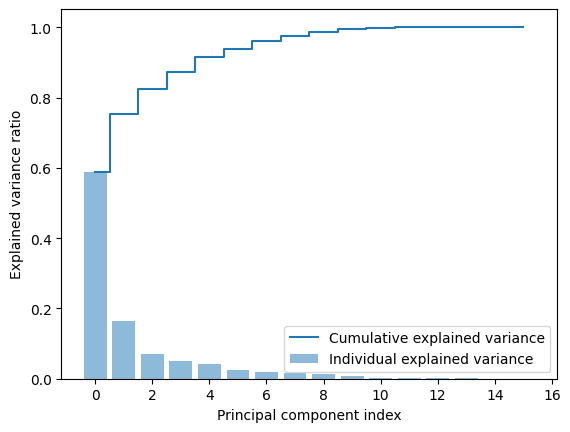

In [ ]:
# --- Mereduksi fitur-fitur berkorelasi tinggi dengan PCA --- 
# Mengelompokkan fitur-fitur numerik berkorelasi tinggi ke dalam dua kelompok fitur 
# Kolom pertama 'pca_num_cols_1' 
pca_num_cols_1 = [
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_1st_sem_grade',
    'Sem1_approval_rate',
    'Sem1_approved_to_credited_ratio',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_without_evaluations',
    'Sem2_approval_rate',
    'Sem2_approved_to_credited_ratio', 
    'Sem2_without_evaluation',
] 

# Kolom kedua 'pca_num_cols_2' 
pca_num_cols_2 = [
    'Previous_qualification_grade',
    'Change_units_without_evaluations',
    'Overall_approval_rate',
    'Overall_average_grade',
    'Overall_approved_to_credited_ratio',
    'Grade_vs_prev_qual'
]

# Melakukan percobaan PCA untuk 
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

# Melakukan percobaan PCA terhadap 'pca_num_cols_1' untuk data pelatihan 
pca = PCA(n_components=len(pca_num_cols_1), random_state=126)
pca.fit(train_pca_df[pca_num_cols_1])
princ_comp = pca.transform(train_pca_df[pca_num_cols_1])

# Visualisasi hasil percobaan PCA terhadap 'pca_num_cols_1' untuk data pelatihan 
var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_num_cols_1)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(len(pca_num_cols_1)), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

Berdasarkan visualisasi di atas untuk 'pca_num_cols_1,' kita bisa menyimpulkan bahwa kita cukup memerlukan n_components sebanyak 4 untuk mencapai nilai cumulative explained variance sebesar di atas 0.8. Oleh karena itu, kita akan menggunakan PCA n_components sebanyak 4 dalam melakukan reduksi fitur-fitur yang dikelompokkan ke dalam 'pca_num_cols_1.' 

In [40]:
# Mereduksi fitur-fitur dalam 'pca_num_cols_1' untuk data pelatihan dengan PCA
pca_1 = PCA(n_components=4, random_state=126)
pca_1.fit(train_pca_df[pca_num_cols_1])
train_princ_comp_1 = pca_1.transform(train_pca_df[pca_num_cols_1])
train_pca_df[["Pc1_1", "Pc1_2", "Pc1_3", "Pc1_4"]] = pd.DataFrame(train_princ_comp_1, columns=["Pc1_1", "Pc1_2", "Pc1_3", "Pc1_4"])
train_pca_df.drop(columns=pca_num_cols_1, axis=1, inplace=True)
display(train_pca_df)

,Marital_status,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,...,Overall_approval_rate,Sem1_without_evaluation,Change_units_without_evaluations,Overall_average_grade,Grade_vs_prev_qual,Overall_approved_to_credited_ratio,Pc1_1,Pc1_2,Pc1_3,Pc1_4
0,0,2,15,1,0,0.218391,0.198824,1,0,1,...,1.000000,0.0,0.73735,0.887725,0.806701,0.000000,0.434580,-0.268745,-0.150723,0.065122
1,1,1,4,1,7,0.172414,0.411765,0,1,0,...,0.000000,0.0,0.73735,0.000000,0.721649,0.000000,-1.265078,0.182217,0.121665,-0.041654
2,0,1,1,1,0,0.597701,0.591765,1,0,1,...,0.000000,0.0,0.73735,0.000000,0.340206,0.000000,-1.564225,-0.063455,-0.620262,0.092084
3,0,1,6,1,0,0.632184,0.294118,0,0,1,...,0.584963,0.0,0.73735,0.842036,0.418557,0.000000,-0.119192,-0.121573,0.064654,-0.164415
4,0,2,15,1,0,0.298851,0.294118,1,0,1,...,0.662965,0.0,0.73735,0.853682,0.721649,0.000000,0.032645,-0.134264,0.084901,-0.046507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,1,1,16,0,0,0.437931,0.370588,0,0,1,...,0.263034,0.0,0.73735,0.839061,0.591753,0.000000,-0.545825,-0.021041,0.189088,-0.368952
2139,0,1,9,1,0,0.241379,0.251765,1,0,1,...,1.000000,0.0,0.73735,0.910706,0.795533,0.000000,0.443551,-0.277334,-0.153981,0.058765
2140,0,1,1,1,0,0.172414,0.267059,1,1,1,...,0.000000,0.0,0.73735,0.000000,0.721649,0.000000,-1.564225,-0.063455,-0.620262,0.092084
2141,0,4,11,1,0,0.436782,0.424706,1,0,1,...,1.000000,0.0,0.73735,0.950793,0.638351,0.000000,0.519971,-0.244184,-0.084076,0.053376


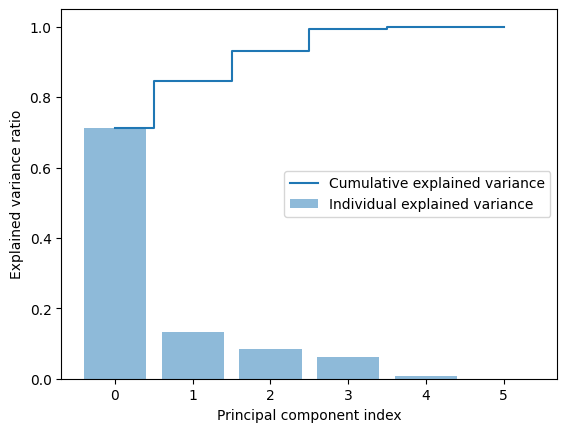

In [41]:
# Melakukan percobaan PCA terhadap 'pca_num_cols_2' untuk data pelatihan 
pca = PCA(n_components=len(pca_num_cols_2), random_state=126)
pca.fit(train_pca_df[pca_num_cols_2])
princ_comp = pca.transform(train_pca_df[pca_num_cols_2])

# Visualisasi hasil percobaan PCA terhadap 'pca_num_cols_2' untuk data pelatihan 
var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)
 
plt.bar(range(len(pca_num_cols_2)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(len(pca_num_cols_2)), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

Berdasarkan visualisasi di atas untuk 'pca_num_cols_2,' kita bisa menyimpulkan bahwa kita cukup memerlukan n_components sebanyak 2 untuk mencapai nilai cumulative explained variance sebesar di atas 0.9. Oleh karena itu, kita akan menggunakan PCA n_components sebanyak 2 dalam melakukan reduksi fitur-fitur yang dikelompokkan ke dalam 'pca_num_cols_2.' 

In [42]:
# Mereduksi fitur-fitur dalam 'pca_num_cols_2' untuk data pelatihan dengan PCA
pca_2 = PCA(n_components=2, random_state=126)
pca_2.fit(train_pca_df[pca_num_cols_2])
train_princ_comp_2 = pca_2.transform(train_pca_df[pca_num_cols_2])
train_pca_df[["Pc2_1", "Pc2_2"]] = pd.DataFrame(train_princ_comp_2, columns=["Pc2_1", "Pc2_2"])
train_pca_df.drop(columns=pca_num_cols_2, axis=1, inplace=True)
display(train_pca_df) 

,Marital_status,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_2nd_sem_grade,Sem1_without_evaluation,Pc1_1,Pc1_2,Pc1_3,Pc1_4,Pc2_1,Pc2_2
0,0,2,15,1,0,0.198824,1,0,1,1,1,0.126301,0.888506,0.0,0.434580,-0.268745,-0.150723,0.065122,0.346032,-0.254816
1,1,1,4,1,7,0.411765,0,1,0,1,1,0.786378,0.000000,0.0,-1.265078,0.182217,0.121665,-0.041654,-0.988909,-0.329863
2,0,1,1,1,0,0.591765,1,0,1,0,0,0.044299,0.000000,0.0,-1.564225,-0.063455,-0.620262,0.092084,-1.034457,0.233218
3,0,1,6,1,0,0.294118,0,0,1,1,0,0.269155,0.833768,0.0,-0.119192,-0.121573,0.064654,-0.164415,-0.036241,0.253434
4,0,2,15,1,0,0.294118,1,0,1,0,0,0.044299,0.826265,0.0,0.032645,-0.134264,0.084901,-0.046507,0.065106,-0.181162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,1,1,16,0,0,0.370588,0,0,1,0,0,0.362009,0.000000,0.0,-0.545825,-0.021041,0.189088,-0.368952,-0.254705,-0.043512
2139,0,1,9,1,0,0.251765,1,0,1,0,0,0.044299,0.904961,0.0,0.443551,-0.277334,-0.153981,0.058765,0.359850,-0.231322
2140,0,1,1,1,0,0.267059,1,1,1,1,1,0.126301,0.000000,0.0,-1.564225,-0.063455,-0.620262,0.092084,-0.988909,-0.329863
2141,0,4,11,1,0,0.424706,1,0,1,0,0,0.044299,0.962145,0.0,0.519971,-0.244184,-0.084076,0.053376,0.367493,0.014237


Kemudian, kita bisa mengaplikasikan teknik reduksi PCA yang serupa terhadap data pengujian. 

In [43]:
# Mereduksi fitur-fitur dalam 'pca_num_cols_1' untuk data uji dengan PCA
test_princ_comp_1 = pca_1.transform(test_pca_df[pca_num_cols_1])
test_pca_df[["Pc1_1", "Pc1_2", "Pc1_3", "Pc1_4"]] = pd.DataFrame(test_princ_comp_1, columns=["Pc1_1", "Pc1_2", "Pc1_3", "Pc1_4"])
test_pca_df.drop(columns=pca_num_cols_1, axis=1, inplace=True)

# Mereduksi fitur-fitur dalam 'pca_num_cols_2' untuk data uji dengan PCA
test_princ_comp_2 = pca_2.transform(test_pca_df[pca_num_cols_2])
test_pca_df[["Pc2_1", "Pc2_2"]] = pd.DataFrame(test_princ_comp_2, columns=["Pc2_1", "Pc2_2"])
test_pca_df.drop(columns=pca_num_cols_2, axis=1, inplace=True)
display(test_pca_df) 

,Marital_status,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_2nd_sem_grade,Sem1_without_evaluation,Pc1_1,Pc1_2,Pc1_3,Pc1_4,Pc2_1,Pc2_2
0,0,1,8,1,0,0.438824,1,0,1,0,0,0.126301,0.848297,0.0,-0.519584,0.006255,0.262632,-0.233806,-0.263199,0.061494
1,3,1,2,0,9,0.176471,0,0,0,0,0,0.471416,0.848297,0.0,0.125053,-0.152467,0.071135,-0.154426,0.109713,0.010377
2,0,3,11,1,0,0.232941,1,0,1,0,1,0.086326,0.851130,0.0,0.151309,-0.133639,0.108921,-0.043914,0.118504,-0.165284
3,0,2,11,1,0,0.410588,1,0,1,0,0,0.044299,0.925894,0.0,0.515495,-0.237343,-0.072070,0.057287,0.336544,0.131155
4,0,1,8,1,0,0.271765,0,0,1,1,0,0.086326,0.905764,0.0,0.375543,-0.291816,-0.199439,0.076303,0.341421,-0.208781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,0,1,15,1,0,0.394118,1,0,1,0,0,0.044299,0.893882,0.0,0.419516,-0.219180,-0.054524,0.069890,0.292067,-0.093288
235,3,1,3,1,7,0.764706,0,0,1,0,0,0.732336,0.929686,0.0,1.035224,1.093025,0.035439,0.283884,0.380718,0.052106
236,3,1,15,1,9,0.152941,0,1,0,0,0,0.521088,0.892695,0.0,0.427979,-0.229173,-0.056292,-0.006664,0.293211,0.025311
237,0,5,11,1,0,0.242353,1,0,1,0,0,0.044299,0.869885,0.0,0.366868,-0.197645,0.000063,0.000772,0.248786,-0.098844


Setelah menjalankan proses reduksi fitur-fitur dalam data pelatihan dan data uji dengan PCA, dataset yang sebelumnya memiliki 36 fitur kini hanya memiliki 20 fitur saja. Hal ini seharusnya akan meringankan beban model machine learning dalam menjalankan dan menguji dataset yang diberikan pada nantinya, yang bermuara pada proses pelatihan dan pengujian dataset yang lebih cepat. 

# Modelling

## Overview & Justification 

Proyek ini secara fundamental memanfaatkan machine learning untuk mengatasi tantangan kompleks memprediksi status dropout siswa, yang kurang lebih sama use case-nya dengan pemodelan risiko kredit. Algoritma RandomForest dipilih sebagai model prediktif utama karena sangat sesuai untuk dataset siswa ini, menawarkan beberapa keunggulan kunci. Model ini efisien dalam menangani dataset dengan jumlah baris yang banyak dan mampu memprediksi output dengan menggabungkan prediksi dari beberapa pohon keputusan (ensemble), yang secara signifikan meningkatkan akurasinya. RandomForest juga mampu menangani data-data kompleks seperti profil/latar belakang siswa, kelas, nilai semester, nilai keseluruhan, dan rasio kinerja siswa, mampu melakukan generalisasi terhadap data baru dengan cukup berkesan, dan bisa berjalan dalam kondisi data terdapat cukup banyak outlier sekalipun. Berbagai keunggulan ini menjadikannya pilihan yang tangguh untuk memprediksi status dropout siswa.

## Model Instantiation & Training 

Sebelum melakukan pelatihan model algoritma RandomForest dengan bantuan hyperparameter fine-tuning RandomizedSearchCV, kita perlu mendefinisikan fitur-fitur dalam RandomForest yang akan kita masukkan ke dalam list 'param_grid' untuk kemudian dimasukkan ke dalam parameter model RandomizedSearchCV untuk dibangun sebelum melatih model ini. Model RandomizedSearchCV dengan parameter terbaik akan dipilih sebagai model untuk pengujian dan pelatihan dataset dalam proyek data science kali ini. 

In [44]:
# --- Model instantiation ---
# Menyiapkan dict 'param_grid' sebagai parameter untuk RandomizedSearchCV
param_grid = {
    'n_estimators': randint(100, 1000),  
    'max_depth': randint(10, 100), 
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': randint(2, 20), 
    'min_samples_leaf': randint(1, 10),   
    'bootstrap': [True, False],       
    'criterion': ['gini', 'entropy', 'log_loss']    
} 

# Membangun model RandomForestClassifier 
rf_model = RandomForestClassifier(random_state=126)

# Membangun model RandomizedSearchCV sebagai hyperparameter tuning 
random_search_cv = RandomizedSearchCV(
    estimator=rf_model,          
    param_distributions=param_grid,
    n_iter=50,                     
    cv=5,                   
    scoring='accuracy',          
    random_state=126,             
    n_jobs=-1,                  
    verbose=2                   
)


# --- Model training --- 
# Melatih model dengan hyperparameter fine-tuning 
random_search_cv.fit(train_pca_df, new_y_train)

# Menampilkan hyperparameter fine-tuning dan skor cross-validation terbaik 
print(f"Best hyperparameters found by RandomizedSearchCV: {random_search_cv.best_params_}")
print(f"\nBest cross-validation score: {random_search_cv.best_score_:.2f}")

# Mengambil 'best_rf_model' dari random_search_cv.best_estimator 
best_rf_model = random_search_cv.best_estimator_
print(f"\nBest RandomForest model (fitted with best parameters): {best_rf_model}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters found by RandomizedSearchCV: {'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 91, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 591}

Best cross-validation score: 0.75

Best RandomForest model (fitted with best parameters): RandomForestClassifier(bootstrap=False, criterion='log_loss', max_depth=91,
                       min_samples_split=15, n_estimators=591,
                       random_state=126)


Hasil dari pelatihan model Random Forest dengan menerapkan hyperparameter fine tuning RandomizedSearchCV menunjukkan bahwa model Random Forest terbaik berhasil mencapai skor cross-validation tertinggi sebesar 0.73. Angka ini merepresentasikan perkiraan kinerja model pada data baru setelah dioptimalkan menggunakan parameter-parameter terbaik yang ditemukan. Dari hasil ini, kita bisa melakukan pelatihan model dengan memanggil objek 'best_rf_model', yang berisikan hyperparameter yang paling optimal sebagaimana disebutkan pada output di atas. 

In [45]:
# Melatih model terbaik hasil hyperparameter fine-tuning  
best_rf_model.fit(train_pca_df, new_y_train) 

RandomForestClassifier(bootstrap=False, criterion='log_loss', max_depth=91,
                       min_samples_split=15, n_estimators=591,
                       random_state=126)

# Evaluation

## Model Prediction

Pengujian (evaluasi) terhadap model RandomForest ini melibatkan empat metrik akurasi, yaitu accuracy, F1-score, precision score, dan recall score. 

In [46]:
# --- Model prediction --- 
# Melakukan prediksi terhadap testing set dan validation set dengan XGBoost
y_pred_train = best_rf_model.predict(train_pca_df)
y_pred_test = best_rf_model.predict(test_pca_df)

# Membuat beberapa variabel metrik akurasi yaitu accuracy, f1-score, recall, dan precision
# Accuracy metric
train_acc = accuracy_score(new_y_train, y_pred_train)
test_acc = accuracy_score(new_y_test, y_pred_test)

# F1-score metric
train_f1_score = f1_score(new_y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(new_y_test, y_pred_test, average='weighted') 

# Recall metric
train_recall = recall_score(new_y_train, y_pred_train, average='weighted')
test_recall = recall_score(new_y_test, y_pred_test, average='weighted')

# Precision metric
train_prec = precision_score(new_y_train, y_pred_train, average='weighted')
test_prec = precision_score(new_y_test, y_pred_test, average='weighted')


# --- Prediction evaluation --- 
# Menampilkan beberapa variabel metrik akurasi
print("\nHasil performa pelatihan model")
print(f"Training accuracy: {train_acc * 100:.2f}% \nTraining F1-score: {train_f1_score * 100:.2f}%")
print(f"Training recall: {train_recall * 100:.2f}% \nTraining precision: {train_prec * 100:.2f}%")

print("\nHasil performa pengujian model")
print(f"Testing accuracy: {test_acc * 100:.2f}% \nTesting F1-score: {test_f1_score * 100:.2f}%")
print(f"Testing recall: {test_recall * 100:.2f}% \nTesting precision: {test_prec * 100:.2f}%")


Hasil performa pelatihan model
Training accuracy: 97.06% 
Training F1-score: 97.06%
Training recall: 97.06% 
Training precision: 97.08%

Hasil performa pengujian model
Testing accuracy: 79.50% 
Testing F1-score: 79.24%
Testing recall: 79.50% 
Testing precision: 80.29%


Pengujian model Random Forest memberikan wawasan penting mengenai kinerjanya dalam memprediksi status siswa. Pada data pelatihan (training), model menunjukkan performa yang sangat impresif, dengan akurasi mencapai 97.06% dan skor F1, recall, precision yang juga tinggi (sekitar 97%). Akan tetapi, saat diuji pada data yang belum pernah dilihat sebelumnya (testing), performanya mengalami penurunan yang signifikan. Akurasi pada data testing adalah 79.50%, dengan skor F1, recall, dan precision juga berada di kisaran 79-80%. Kesenjangan antara performa training dan testing ini mengindikasikan adanya overfitting, di mana model terlalu menghafal data pelatihan dan kurang mampu melakukan generalisasi. Oleh karena itu, akurasi testing sebesar 79.50% menjadi ukuran yang lebih realistis mengenai seberapa baik model Random Forest ini akan bekerja dalam memprediksi status siswa baru secara umum di dunia nyata.

## Exporting the Model 

Model yang sudah dilatih dan diuji kemudian disimpan sebagai sebuah file .joblib bernama 'model.joblib' di penyimpanan lokal untuk kemudian digunakan oleh aplikasi prototype machine learning yang dibangun dengan library Streamlit. 

In [47]:
# Menyimpan model yang sudah dilatih untuk prediksi (inferensi) secara lokal
try:
    joblib.dump(best_rf_model, "model/random_forest.joblib")
    print(f"Model Random Forest telah berhasil disimpan sebagai 'random_forest.joblib'")
except Exception as e:
    print(f"Gagal menyimpan model: {e}")

Model Random Forest telah berhasil disimpan sebagai 'random_forest.joblib'


## Feature Importance Visualization 

Visualisasi feature importance dilakukan untuk mendapatkan gambaran tentang bagaimana sebuah fitur bisa mempengaruhi hasil prediksi sebuah model. Dari sini, kita bisa menyimpulkan fitur-fitur yang paling mempengaruhi hasil prediksi sebuah model. 

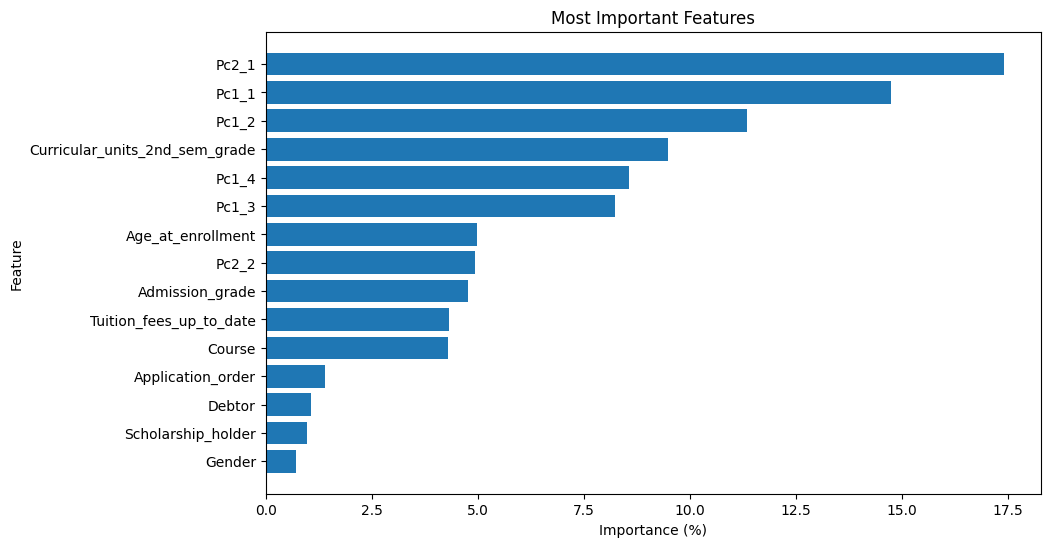

In [48]:
# --- Feature importance evaluation --- 
# Instansiasi variabel 'feature_importances_df' 
feature_importances = best_rf_model.feature_importances_ 

feature_importances_df = pd.DataFrame({
    'Features': train_pca_df.columns,
    'Importance': feature_importances * 100 
})

# Menyortir fitur-fitur berdasarkan Importance Rate dan hanya menampilkan 15 besar dengan Importance Rate tertinggi
plot_df = feature_importances_df.sort_values(by='Importance', ascending=False).head(15)

# Visualisasi Feature Importance dengan bar chart
plt.figure(figsize=(10, 6))
plt.barh(plot_df['Features'], plot_df['Importance'])
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.title('Most Important Features')
plt.gca().invert_yaxis()
plt.show()

Visualisasi feature importance di atas jelas menunjukkan bahwa fitur 'Pc2_1' (dimensi pertama dari hasil reduksi pca_num_cols_2) memiliki tingkat fitur importance yang tertinggi dalam list ini (17.5%), disusul oleh 'Pc1_1' (~15%) dan 'Pc1_2' (~11%). Hal ini berarti bahwa ketiga fitur tersebut merupakan fitur yang paling mempengaruhi hasil prediksi model secara keseluruhan apabila dibandingkan dengan fitur-fitur lainnya dalam proyek data science kali ini. 

## Classification Report 

Classification report dimanfaatkan untuk mengetahui metrik performa model yang sudah diuji pada masing-masing kategori dalam sebuah fitur, bukan sekadar hanya sebuah fitur secara keseluruhan saja. Metrik yang akan digunakan dalam mengukur kinerja model sama dengan sub-bagian Model Prediction, yaitu accuracy, F1-score, precision score, dan recall score. 

In [49]:
# --- Menampilkan classification report --- 
print("Classification Report\n") 
print(classification_report(new_y_test, y_pred_test, digits=2))

Classification Report

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        76
           1       0.79      0.70      0.74        86
           2       0.74      0.95      0.83        77

    accuracy                           0.79       239
   macro avg       0.80      0.80      0.79       239
weighted avg       0.80      0.79      0.79       239



Apabila kita kesampingkan kategori lainnya dalam fitur Status selain kategori 'Dropout', model menunjukkan kinerja yang cukup baik dalam mengidentifikasi kelas ini berdasarkan classification report. Dengan nilai precision 0.88, berarti 88% dari siswa yang diprediksi dropout oleh model memang benar-benar merupakan siswa dropout. Nilai recall 0.75 mengindikasikan bahwa model berhasil menangkap atau mengidentifikasi 75% dari seluruh siswa yang sebenarnya dropout. Skor f1-score 0.81 merepresentasikan keseimbangan yang baik antara precision dan recall untuk kelas ini, yang jumlah sampel aslinya di data uji (support) adalah 76 siswa.

## Confusion Matrix Visualization using Heat Map 

Selain metrik-metrik terkait akurasi yang sudah dijelaskan sebelumnya, kita juga perlu mengetahui bagaimana sebuah model dapat memprediksi sebuah sampel data dengan tepat. Oleh karena itu, kita perlu melakukan visualisasi confusion matrix dalam bentuk heat map untuk mengilustrasikan kemampuan model dalam hal prediksi sebuah sampel data sebagai salah satu kategori dengan tepat dan presisi, dengan membandingkan jumlah antara actual (sebenarnya) dengan predicted (hasil prediksinya belum tentu tepat). 

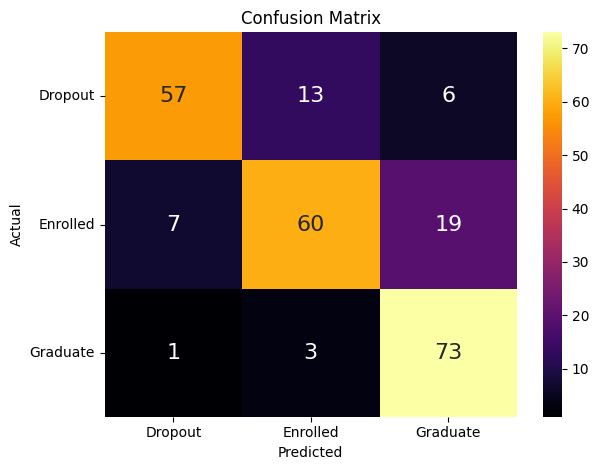

In [50]:
# --- High-fidelity confusion matrix evaluation --- 
# Instansiasi variabel 'conf_mat' dan 'target_names' untuk kebutuhan visualisasi 
target_names = ['Dropout', 'Enrolled', 'Graduate']
conf_mat = confusion_matrix(new_y_test, y_pred_test)

# Menampilkan visualisasi confusion matrix dengan heat map 
sns.heatmap(
    conf_mat, 
    annot=True, 
    annot_kws={"size": 16}, 
    cmap='inferno', 
    fmt='d',
    xticklabels=target_names, 
    yticklabels=target_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(rotation=0, ha='center')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()